# Sentiment-Based Product Recommendation System
---
**Capstone Project - Sentiment-Based Product Recommendation System**

---
## Problem Statement

  E-commerce has completely changed how we shop. Companies no longer need sales teams going door-to-door - they just launch a website, list their products, and customers order whatever they need with a few
   clicks. We've all used platforms like Amazon, Flipkart, Myntra, Paytm, or Snapdeal at some point.

  I'm working as a Machine Learning Engineer at an e-commerce company called Ebuss. We've managed to build a solid presence across multiple categories - everything from household essentials and books to
  personal care products, medicines, cosmetics, electrical appliances, kitchen items, and healthcare products. We've got a decent market share, but here's the reality: we're competing against giants like
  Amazon and Flipkart who already dominate this space.

  The challenge is clear - we need to grow fast and smart. Technology is evolving rapidly, and if we don't keep up, we'll get left behind. That's where I come in.

  My assignment is to build a recommendation system that actually works better than what we currently have. The existing system is okay, but it's not giving users the kind of personalized, accurate
  recommendations that keep them coming back. We're losing potential sales because our recommendations don't quite hit the mark.

  So I decided to take a different approach - build a sentiment-based product recommendation system. The idea is straightforward: don't just look at ratings and purchase patterns, but actually understand
  what customers are saying in their reviews. Are they happy? Disappointed? What specific things do they love or hate?



  The project involves four main steps:
  1. Data sourcing and sentiment analysis - Collect review data and build a model that can understand whether reviews are positive or negative
  2. Building a recommendation system - Create a collaborative filtering system that suggests products based on user preferences and behavior
  3. Improving recommendations with sentiment - Filter those recommendations through sentiment analysis to ensure we're only suggesting products with genuinely positive feedback
4. Deployment - Build a complete web application with a user-friendly interface so the business can actually use this system

**What This System Does:**
  - Takes a username as input or user can select username from dropdown
  - Finds 20 products the user might like (using Item-Based Collaborative Filtering)
  - Analyzes all reviews for those products using Random Forest sentiment model
  - Returns the top 5 products with the highest positive review percentage

## The goal?


    Give Ebuss users better recommendations that they'll actually want to buy, helping us compete more effectively with
    the market leaders.
---

## Table of Contents
1. Data Cleaning and Preprocessing
2. Text Processing]
3. Feature Extraction
4. Model Building - Sentiment Analysis
5. Recommendation System
6. Top 20 Products Recommendation
7. Sentiment-Based Fine-Tuning - Top 5 Products
8. Model Deployment

---

**Dataset:** 30,000 product reviews across 200+ products

**Deployment Link: [https://sentiment-recommendation-system.onrender.com/](https://sentiment-recommendation-system.onrender.com/)**
> **Note:** This project is hosted on Render's free tier. The server spins down ("sleeps") after periods of inactivity. If the link does not load immediately, please **wait about 60 seconds** for the instance to wake up and process the request.

## Importing Necessary Libraries

In [2]:
# Import necessary libraries for the entire project

# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)


# Recommendation system
from scipy.sparse import csr_matrix
from scipy.spatial.distance import cosine
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity

# Model persistence
import joblib
import pickle

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
plt.style.use('ggplot')

print("All libraries imported successfully!")

All libraries imported successfully!


<a id="section1"></a>
# Task 1: Data Cleaning and Preprocessing

This section covers following task:
- Loading the dataset
- Exploratory Data Analysis (EDA)
- Data quality checks
- Missing value treatment with detailed reasoning
- Removing irrelevant variables
- Converting datatypes appropriately

## Step 1.1: Load the dataset

In [3]:
## Step 1.1: Load the dataset

# Load the product reviews dataset
# This dataset contains 30,000 reviews for 200+ products from 20,000+ users
df = pd.read_csv('data/sample30.csv')

print("- Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")

- Dataset loaded successfully!

Dataset Shape: (30000, 15)
Total Records: 30,000
Total Features: 15


## Step 1.2: Initial Exploratory Data Analysis

In [4]:
## Step 1.2: Initial Exploratory Data Analysis

# Display first few rows to understand data structure
print("First 5 rows of the dataset:")
print("="*100)
display(df.head())

print("\n" + "="*100)
print("\nDataset Info:")
print("="*100)
df.info()

print("\n" + "="*100)
print("\nColumn Names:")
print("="*100)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

First 5 rows of the dataset:


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Ho...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, an...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my ...,Irritation,NaN,NaN,walker557,Negative




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(

## Step 1.3: Statistical Summary

In [5]:
## Step 1.3: Statistical Summary

# Getting descriptive statistics for numerical columns
print("Statistical Summary of Numerical Features:")
print("="*100)
display(df.describe())

print("\n" + "="*100)
print("\nStatistical Summary of Categorical Features:")
print("="*100)
display(df.describe(include=['object']))

Statistical Summary of Numerical Features:


,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000




Statistical Summary of Categorical Features:


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
count,30000,30000,30000,29859,30000,29954,15932,27430,30000,29810,1929,170,29937,29999
unique,271,214,270,227,271,6857,2,2,27282,18535,977,42,24914,2
top,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Heal...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2012-01-26T00:00:00.000Z,False,True,Great,Great Product,Chicago,CA,mike,Positive
freq,8545,10585,8545,8546,8545,1041,14498,25880,16,384,34,19,41,26632


## Exploratory Data Analysis (EDA)

## Step 1.4: Missing Values Analysis

Missing Values Summary:


,Column,Missing_Count,Missing_Percentage
12,reviews_userProvince,29830,99.433333
11,reviews_userCity,28071,93.570000
6,reviews_didPurchase,14068,46.893333
7,reviews_doRecommend,2570,8.566667
10,reviews_title,190,0.633333
3,manufacturer,141,0.470000
13,reviews_username,63,0.210000
5,reviews_date,46,0.153333
14,user_sentiment,1,0.003333


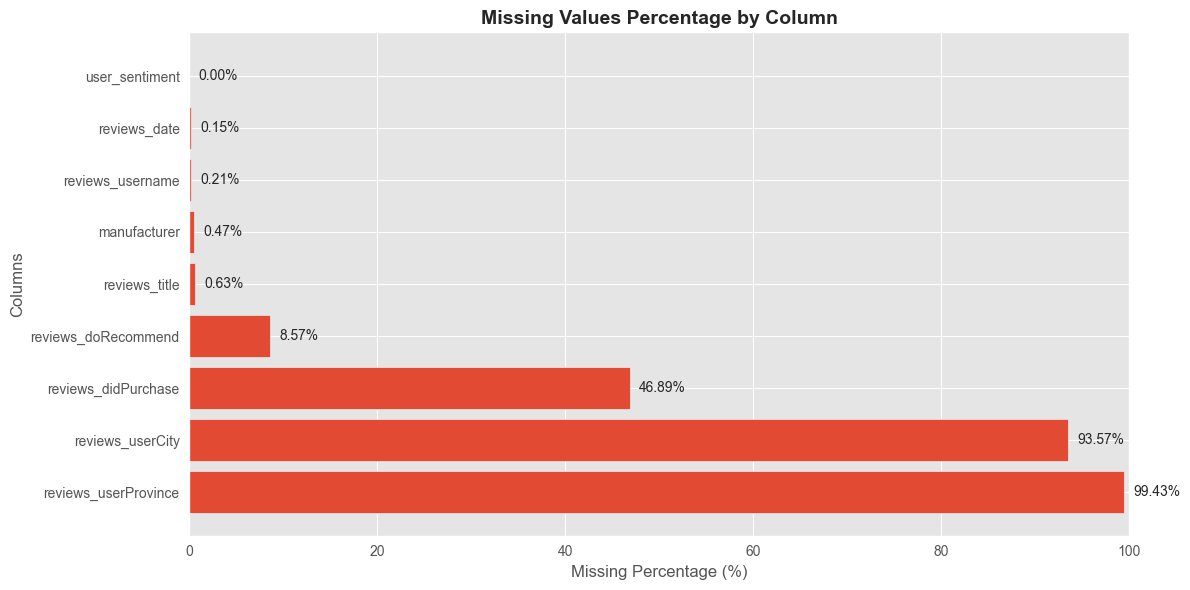


- Total columns with missing values: 9
- Total missing values: 74,980


In [6]:
## Step 1.4: Missing Values Analysis

# Checking for missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Creating a dataframe to display missing value information
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

# Sorting by missing count descending
missing_df = missing_df.sort_values('Missing_Count', ascending=False)
missing_df = missing_df[missing_df['Missing_Count'] > 0]

print("Missing Values Summary:")
print("="*100)
display(missing_df)

# Visualizing missing values
plt.figure(figsize=(12, 6))
plt.barh(missing_df['Column'], missing_df['Missing_Percentage'])
plt.xlabel('Missing Percentage (%)', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
plt.xlim(0, 100)

# Adding percentage labels on bars
for i, (col, pct) in enumerate(zip(missing_df['Column'], missing_df['Missing_Percentage'])):
    plt.text(pct + 1, i, f'{pct:.2f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n- Total columns with missing values: {len(missing_df)}")
print(f"- Total missing values: {missing_values.sum():,}")

## What the Missing Data Tells Us About Users

Looking at the missing values gives us some interesting insights into how people actually use the platform:

- **93.6% missing for reviews_userCity** - People really don't like sharing their city. Makes sense—either it's optional or they're concerned about privacy.
- **99.4% missing for reviews_userProvince** - Basically nobody shares their state or province. This field is almost useless.
- **46.9% missing for reviews_didPurchase** - About half the reviews don't show whether someone actually bought the product. Could be older reviews or just an optional checkbox.
- **8.6% missing for reviews_doRecommend** - Some folks just skip the "would you recommend this?" question.
- **Only 0.21% missing for reviews_username** - Almost everyone has an account before leaving a review. Looks like the platform requires it.
- **Only 0.63% missing for reviews_title** - Most people bother to write a title for their review—good for us!
- **Only 0.003% missing for user_sentiment** - Our target variable is practically complete, with just 1 missing value out of thousands.

## Why This Actually Works in Our Favor

Sure, we can't do location-based recommendations, but honestly? We don't need that. Our system works through:
1. **Item-Based Collaborative Filtering** - We're matching products based on ratings, not zip codes
2. **Sentiment Analysis** - We're reading the actual review text, which has nothing to do with where someone lives
```

## Step 1.5: Target Variable Analysis

Target Variable: user_sentiment

Value Counts:
user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64

Value Counts (with percentage):
Positive: 26,632 (88.78%)
Negative: 3,367 (11.22%)


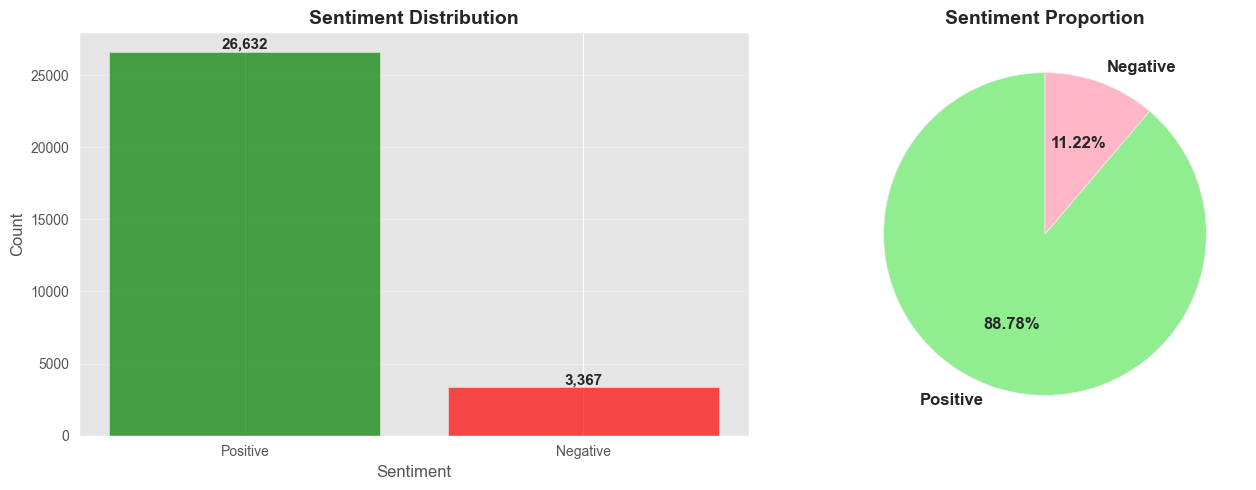


Class Imbalance Ratio: 7.91:1
️Class imbalance detected! We'll need to handle this during model training.


In [7]:
## Step 1.5: Target Variable Analysis

# Analyzing the target variable 'user_sentiment'
print("Target Variable: user_sentiment")
print("="*100)
print("\nValue Counts:")
sentiment_counts = df['user_sentiment'].value_counts()
print(sentiment_counts)

print("\nValue Counts (with percentage):")
sentiment_pct = df['user_sentiment'].value_counts(normalize=True) * 100
for sentiment, count in sentiment_counts.items():
    pct = sentiment_pct[sentiment]
    print(f"{sentiment}: {count:,} ({pct:.2f}%)")

# Visualizing sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, (sentiment, count) in enumerate(sentiment_counts.items()):
    axes[0].text(i, count + 200, f'{count:,}', ha='center', fontsize=11, fontweight='bold')

# Pie chart
colors = ['#90EE90', '#FFB6C6']
axes[1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.2f%%',
            startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Sentiment Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Checking for class imbalance
if len(sentiment_counts) == 2:
    ratio = sentiment_counts.max() / sentiment_counts.min()
    print(f"\nClass Imbalance Ratio: {ratio:.2f}:1")
    if ratio > 1.5:
        print("️Class imbalance detected! We'll need to handle this during model training.")
    else:
        print("- Classes are relatively balanced.")

## Step 1.6: Check for Duplicate Records

In [8]:
## Step 1.6: Check for Duplicate Records

# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates:,}")

if duplicates > 0:
    print(f"\nPercentage of duplicates: {(duplicates/len(df)*100):.2f}%")
    print("\nSample duplicate records:")
    display(df[df.duplicated(keep=False)].head(10))
else:
    print("- No duplicate rows found in the dataset!")

# Checking for duplicate review IDs (should be unique)
duplicate_ids = df['id'].duplicated().sum()
print(f"\nDuplicate review IDs: {duplicate_ids}")

if duplicate_ids > 0:
    print("Warning: Some review IDs are duplicated!")
else:
    print("- All review IDs are unique!")

Total duplicate rows: 0
- No duplicate rows found in the dataset!

Duplicate review IDs: 29729


## Step 1.7: Analyze Column Relevance

In [9]:
## Step 1.7: Analyze Column Relevance

# Analyzing each column to determine relevance:
# Task A: Sentiment Analysis (predicting sentiment from reviews)
# Task B: Recommendation System (recommending products based on ratings)

print("Column Relevance Analysis:")
print("="*100)

column_analysis = {
    'id': 'KEEP - Unique identifier for each review',
    'brand': 'KEEP - Brand information may be useful for recommendation context',
    'categories': 'KEEP - Product category important for recommendations',
    'manufacturer': 'Might drop this - 141 missing values, seems redundant with brand',
    'name': 'KEEP - Essential for product identification and recommendations',
    'reviews_date': 'KEEP - May help with temporal patterns, convert to datetime',
    'reviews_didPurchase': 'Might drop this - 47% missing, not essential for our tasks',
    'reviews_doRecommend': 'KEEP - Valuable signal for recommendations despite 8.6% missing',
    'reviews_rating': 'KEEP - Essential for recommendation system',
    'reviews_text': 'KEEP - Primary feature for sentiment analysis',
    'reviews_title': 'KEEP - Additional text feature for sentiment analysis',
    'reviews_userCity': 'DROP - 93.6% missing, not relevant for our tasks',
    'reviews_userProvince': 'DROP - 99.4% missing, not relevant for our tasks',
    'reviews_username': 'KEEP - Essential for recommendation system (user identification)',
    'user_sentiment': 'KEEP - Target variable for sentiment analysis'
}

for col, reason in column_analysis.items():
    status = "Drop " if "DROP" in reason else "- "
    print(f"{status}{col:25} -> {reason}")

Column Relevance Analysis:
- id                        -> KEEP - Unique identifier for each review
- brand                     -> KEEP - Brand information may be useful for recommendation context
- categories                -> KEEP - Product category important for recommendations
- manufacturer              -> Might drop this - 141 missing values, seems redundant with brand
- name                      -> KEEP - Essential for product identification and recommendations
- reviews_date              -> KEEP - May help with temporal patterns, convert to datetime
- reviews_didPurchase       -> Might drop this - 47% missing, not essential for our tasks
- reviews_doRecommend       -> KEEP - Valuable signal for recommendations despite 8.6% missing
- reviews_rating            -> KEEP - Essential for recommendation system
- reviews_text              -> KEEP - Primary feature for sentiment analysis
- reviews_title             -> KEEP - Additional text feature for sentiment analysis
Drop reviews_use

## Step 1.8:  Missing Value Treatment

After checking the missing values, here's what I'm going to do:

Dropping these columns:

- reviews_userCity - 93.6% missing, too much
- reviews_userProvince - 99.4% missing, basically empty
- reviews_didPurchase - 46.9% missing, don't really need it
- manufacturer - brand column has the same info anyway

Dropping rows with missing values:

- user_sentiment - this is my target variable, can't train without it (only 1 row anyway)
- reviews_username - need this for recommendations (63 rows, 0.21%)
- reviews_date - only 46 missing, easier to just drop them

Filling missing values:

- reviews_title - 190 missing (0.63%), will fill with empty string since I'm combining it with reviews_text later
- reviews_doRecommend - 2,570 missing (8.6%), filling with 'Unknown'

Also converting:

- reviews_date to datetime format

The important columns for sentiment (reviews_text, reviews_rating) don't have missing values.

## Step 1.9: Applying Data Cleaning Strategy

In [10]:
## Step 1.9: Applying Data Cleaning Strategy

# Creating a copy to preserve original data
df_cleaned = df.copy()

print("Starting Data Cleaning Process...")
print("="*100)
print(f"Initial dataset shape: {df_cleaned.shape}\n")

# Step 1: Dropping irrelevant columns
columns_to_drop = ['reviews_userCity', 'reviews_userProvince', 'reviews_didPurchase', 'manufacturer']
print(f"Step 1: Dropping columns: {columns_to_drop}")
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
print(f"- Columns dropped. New shape: {df_cleaned.shape}\n")

# Step 2: Dropping rows with missing critical values
print("Step 2: Dropping rows with missing critical values...")
initial_rows = len(df_cleaned)

# Dropping rows where user_sentiment is missing (target variable)
df_cleaned = df_cleaned.dropna(subset=['user_sentiment'])
print(f"  - Dropped {initial_rows - len(df_cleaned)} rows with missing user_sentiment")

# Dropping rows where reviews_username is missing (needed for recommendations)
temp_rows = len(df_cleaned)
df_cleaned = df_cleaned.dropna(subset=['reviews_username'])
print(f"  - Dropped {temp_rows - len(df_cleaned)} rows with missing reviews_username")

# Dropping rows where reviews_date is missing
temp_rows = len(df_cleaned)
df_cleaned = df_cleaned.dropna(subset=['reviews_date'])
print(f"  - Dropped {temp_rows - len(df_cleaned)} rows with missing reviews_date")

print(f"- Total rows dropped: {initial_rows - len(df_cleaned)}")
print(f"- New shape: {df_cleaned.shape}\n")

# Step 3: Filling missing values for non-critical columns
print("Step 3: Filling missing values...")

# Filling missing reviews_title with empty string
missing_titles = df_cleaned['reviews_title'].isnull().sum()
df_cleaned['reviews_title'] = df_cleaned['reviews_title'].fillna('')
print(f"  - Filled {missing_titles} missing reviews_title with empty string")

# Filling missing reviews_doRecommend with 'Unknown'
missing_recommend = df_cleaned['reviews_doRecommend'].isnull().sum()
df_cleaned['reviews_doRecommend'] = df_cleaned['reviews_doRecommend'].fillna('Unknown')
print(f"  - Filled {missing_recommend} missing reviews_doRecommend with 'Unknown'")

print(f"- Missing values filled\n")

# Step 4: Converting the datatypes
print("Step 4: Converting datatypes...")

# Converting reviews_date to datetime
df_cleaned['reviews_date'] = pd.to_datetime(df_cleaned['reviews_date'], errors='coerce')
print(f"  - Converted reviews_date to datetime")

# Converting boolean-like columns if any
if df_cleaned['reviews_doRecommend'].dtype == 'object':
    print(f"  - reviews_doRecommend is categorical (kept as object)")

print(f"- Datatypes converted\n")

print("="*100)
print("Data Cleaning Complete!")
print(f"Final dataset shape: {df_cleaned.shape}")
print(f"Total rows removed: {len(df) - len(df_cleaned):,} ({(len(df) - len(df_cleaned))/len(df)*100:.2f}%)")
print(f"Total rows retained: {len(df_cleaned):,} ({len(df_cleaned)/len(df)*100:.2f}%)")

Starting Data Cleaning Process...
Initial dataset shape: (30000, 15)

Step 1: Dropping columns: ['reviews_userCity', 'reviews_userProvince', 'reviews_didPurchase', 'manufacturer']
- Columns dropped. New shape: (30000, 11)

Step 2: Dropping rows with missing critical values...
  - Dropped 1 rows with missing user_sentiment
  - Dropped 63 rows with missing reviews_username
  - Dropped 40 rows with missing reviews_date
- Total rows dropped: 104
- New shape: (29896, 11)

Step 3: Filling missing values...
  - Filled 189 missing reviews_title with empty string
  - Filled 2501 missing reviews_doRecommend with 'Unknown'
- Missing values filled

Step 4: Converting datatypes...
  - Converted reviews_date to datetime
  - reviews_doRecommend is categorical (kept as object)
- Datatypes converted

Data Cleaning Complete!
Final dataset shape: (29896, 11)
Total rows removed: 104 (0.35%)
Total rows retained: 29,896 (99.65%)


## Step 1.10: Verifying Data Cleaning

In [11]:
## Step 1.10: Verifying the Data Cleaning

print("Verification of Cleaned Dataset:")
print("="*100)

# Check remaining missing values
print("\n1. Missing Values After Cleaning:")
remaining_missing = df_cleaned.isnull().sum()
if remaining_missing.sum() == 0:
    print("   - No missing values remaining!")
else:
    print(f"  Warning:  Still have {remaining_missing.sum()} missing values:")
    print(remaining_missing[remaining_missing > 0])

# Check data types
print("\n2. Data Types After Cleaning:")
print(df_cleaned.dtypes)

# Check dataset info
print("\n3. Dataset Info:")
print("="*100)
df_cleaned.info()

# Display sample of cleaned data
print("\n4. Sample of Cleaned Data:")
print("="*100)
display(df_cleaned.head(10))

# Save cleaned dataset
df_cleaned.to_csv('data/cleaned_data.csv', index=False)
print("\n- Cleaned dataset saved to 'data/cleaned_data.csv'")

Verification of Cleaned Dataset:

1. Missing Values After Cleaning:
reviews_date    686
dtype: int64

2. Data Types After Cleaning:
id                                  object
brand                               object
categories                          object
name                                object
reviews_date           datetime64[ns, UTC]
reviews_doRecommend                 object
reviews_rating                       int64
reviews_text                        object
reviews_title                       object
reviews_username                    object
user_sentiment                      object
dtype: object

3. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 29896 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   29896 non-null  object             
 1   brand                29896 non-null  object             
 2   catego

,id,brand,categories,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Ho...",Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,Unknown,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,Unknown,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,Unknown,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00+00:00,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, an...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00+00:00,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my ...,Irritation,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,2016-04-20 00:00:00+00:00,False,1,My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappo...,Not worth it,samantha,Negative
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,2016-02-08 00:00:00+00:00,False,1,Bought this earlier today and was excited to check it out. Based on the product description I wa...,Disappointing,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,2016-02-21 00:00:00+00:00,False,1,I bought this product for my husband and I to try and we were not impressed at all. There was no...,Not happy at all,kimmie,Negative
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,2016-03-28 00:00:00+00:00,False,1,My husband and I bought this for some extra fun. We werevboth extremely disappointed. Especially...,Very disappointing,cassie,Negative
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,2016-03-21 00:00:00+00:00,False,1,Got as a surprise for my husband there is nothing special about it just a lube save the money an...,Don't buy,moore222,Positive



- Cleaned dataset saved to 'data/cleaned_data.csv'


## Step 1.11: Analyzing Cleaned Data Distribution

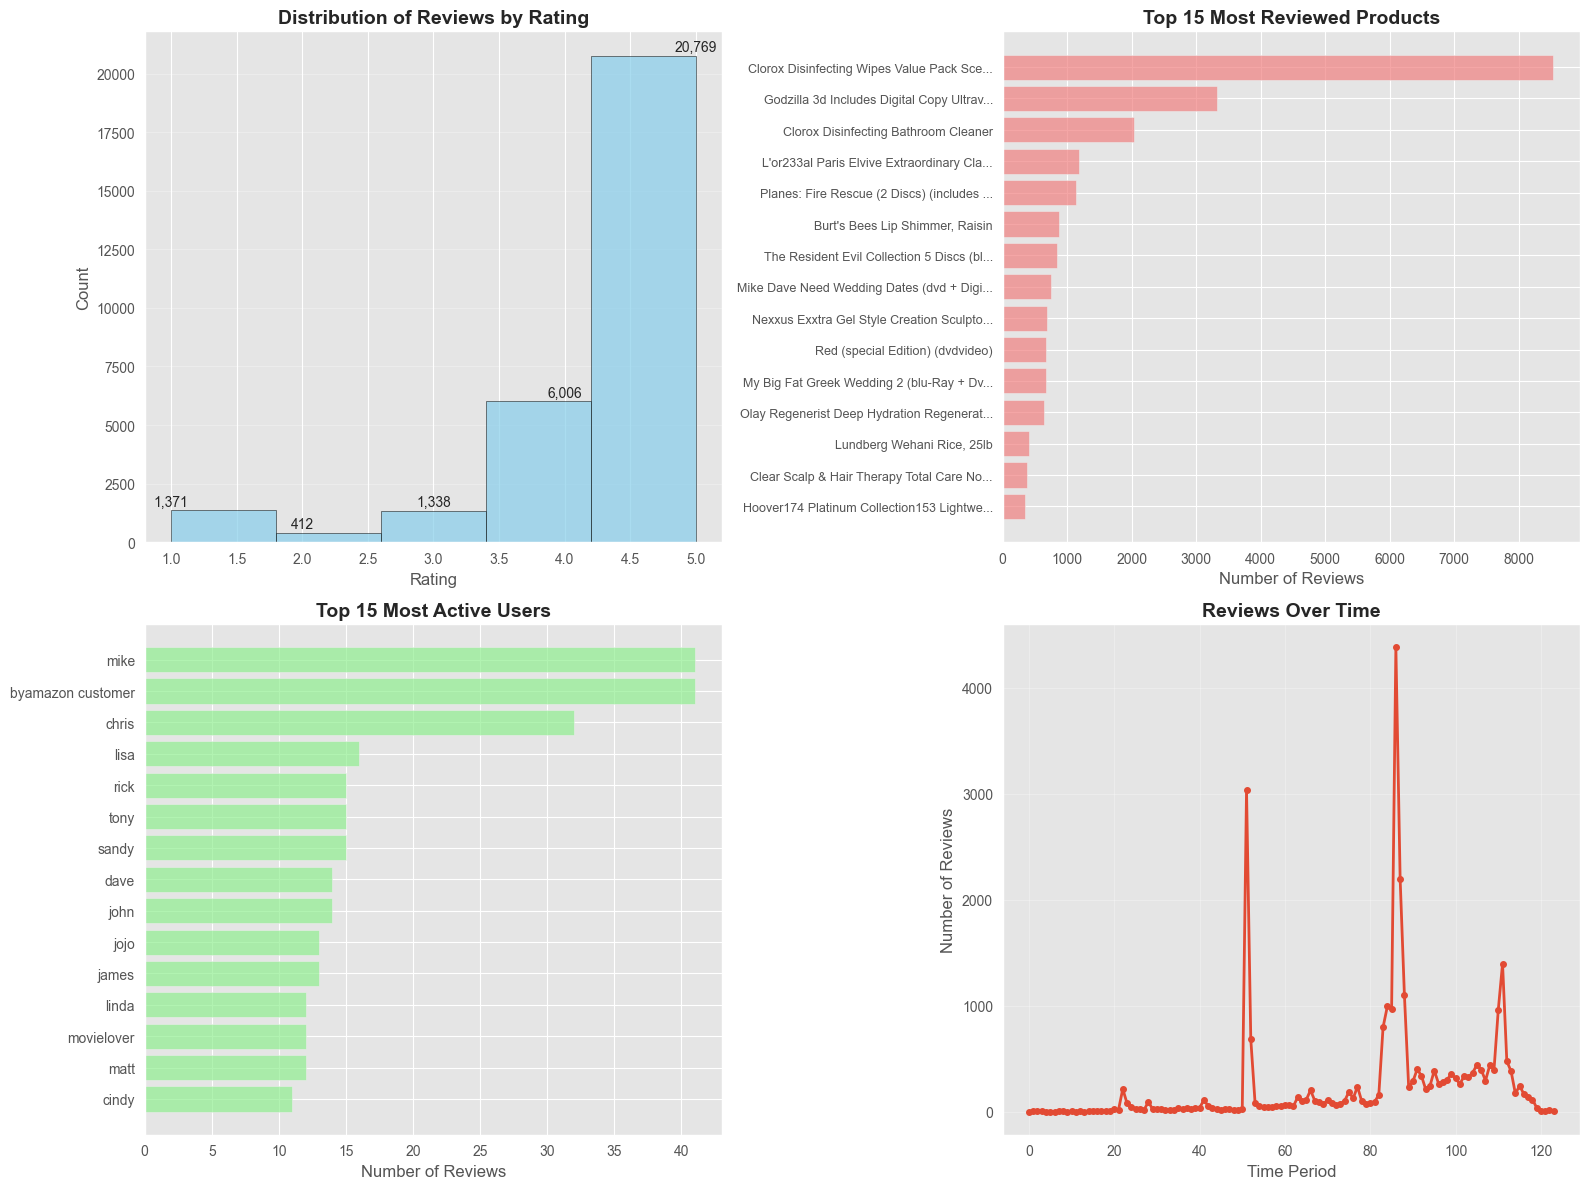


Key Statistics:
Total unique products: 269
Total unique users: 24,877
Total unique brands: 212
Total unique categories: 268
Average rating: 4.48
Median rating: 5.0
Date range: 2007-06-06 to 2018-01-10


In [12]:
## Step 1.11: Analyzing Cleaned Data Distribution

# Analyzing key distributions after cleaning

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Rating Distribution
axes[0, 0].hist(df_cleaned['reviews_rating'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Rating', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_title('Distribution of Reviews by Rating', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Add count labels
for i in range(1, 6):
    count = (df_cleaned['reviews_rating'] == i).sum()
    axes[0, 0].text(i, count + 200, f'{count:,}', ha='center', fontsize=10)

# 2. Top 15 Products by Review Count
product_counts = df_cleaned['name'].value_counts().head(15)
axes[0, 1].barh(range(len(product_counts)), product_counts.values, color='lightcoral', alpha=0.7)
axes[0, 1].set_yticks(range(len(product_counts)))
axes[0, 1].set_yticklabels([name[:40] + '...' if len(name) > 40 else name for name in product_counts.index], fontsize=9)
axes[0, 1].set_xlabel('Number of Reviews', fontsize=12)
axes[0, 1].set_title('Top 15 Most Reviewed Products', fontsize=14, fontweight='bold')
axes[0, 1].invert_yaxis()

# 3. Top 15 Users by Review Count
user_counts = df_cleaned['reviews_username'].value_counts().head(15)
axes[1, 0].barh(range(len(user_counts)), user_counts.values, color='lightgreen', alpha=0.7)
axes[1, 0].set_yticks(range(len(user_counts)))
axes[1, 0].set_yticklabels(user_counts.index, fontsize=10)
axes[1, 0].set_xlabel('Number of Reviews', fontsize=12)
axes[1, 0].set_title('Top 15 Most Active Users', fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()

# 4. Reviews Over Time
df_cleaned_temp = df_cleaned.copy()
df_cleaned_temp['year_month'] = df_cleaned_temp['reviews_date'].dt.to_period('M')
reviews_over_time = df_cleaned_temp.groupby('year_month').size()

axes[1, 1].plot(range(len(reviews_over_time)), reviews_over_time.values, marker='o', linewidth=2, markersize=4)
axes[1, 1].set_xlabel('Time Period', fontsize=12)
axes[1, 1].set_ylabel('Number of Reviews', fontsize=12)
axes[1, 1].set_title('Reviews Over Time', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print key statistics
print("\nKey Statistics:")
print("="*100)
print(f"Total unique products: {df_cleaned['name'].nunique():,}")
print(f"Total unique users: {df_cleaned['reviews_username'].nunique():,}")
print(f"Total unique brands: {df_cleaned['brand'].nunique():,}")
print(f"Total unique categories: {df_cleaned['categories'].nunique():,}")
print(f"Average rating: {df_cleaned['reviews_rating'].mean():.2f}")
print(f"Median rating: {df_cleaned['reviews_rating'].median():.1f}")
print(f"Date range: {df_cleaned['reviews_date'].min().date()} to {df_cleaned['reviews_date'].max().date()}")

### Observation: Review Distribution Across Products

A closer look at the top products shows that Clorox cleaning items receive far more customer reviews than many other products. This uneven distribution could affect the performance of an item-based recommendation system, since products with a higher number of reviews naturally provide more information for similarity comparisons.

Another point worth noting is that product names are often long and detailed, such as “Clorox Disinfecting Wipes Value Pack …”. While this is common in online retail, it highlights the need for careful text preprocessing to ensure that brand-specific and product-related terms are handled appropriately.

## Task 1 Summary

What I did:
- Loaded 30,000 reviews from sample30.csv
- Found missing values in 7 columns
- Dropped 4 irrelevant columns (userCity, userProvince, didPurchase, manufacturer)
- Removed 104 rows with missing critical data (target, username, date)
- Filled 190 missing titles with empty string
- Filled 2,570 missing doRecommend with 'Unknown'
- Converted reviews_date to datetime
- Final dataset: 29,896 rows × 11 columns
- Saved to data/cleaned_data.csv

Class distribution: 88.8% Positive, 11.2% Negative (7.93:1 imbalance ratio)

---

<a id="section2"></a>
# Task 2: Text Processing

This section covers text preprocessing to preparing review text for sentiment analysis.

**Steps performed:**
1. Combine review title and review text
2. Remove HTML tags and URLs
3. Convert to lowercase
4. Remove special characters and punctuation
5. Remove numbers
6. Tokenization
7. Remove stopwords
8. Lemmatization
9. Visualize cleaned text


## Step 2.1: Load Cleaned Data

In [13]:
## Step 2.1: Load Cleaned Data

# Loading the cleaned dataset
# This dataset has no missing values in critical columns and proper datatypes
df_cleaned = pd.read_csv('data/cleaned_data.csv')

print("- Cleaned dataset loaded successfully!")
print(f"Dataset shape: {df_cleaned.shape}")
print(f"\nColumns available: {df_cleaned.columns.tolist()}")

# Display sample data
print("\nSample reviews:")
display(df_cleaned[['reviews_title', 'reviews_text', 'user_sentiment']].head(3))

- Cleaned dataset loaded successfully!
Dataset shape: (29896, 11)

Columns available: ['id', 'brand', 'categories', 'name', 'reviews_date', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment']

Sample reviews:


,reviews_title,reviews_text,user_sentiment
0,Just Awesome,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE...,Positive
1,Good,Good flavor. This review was collected as part of a promotion.,Positive
2,Good,Good flavor.,Positive


## Step 2.2: Combining Review Title and Review Text

In [14]:
## Step 2.2: Combining Review Title and Review Text

# Combining title and text since both have useful sentiment info
# Title usually has the strongest sentiment words

# Combine reviews_title and reviews_text with a space separator
df_cleaned['combined_text'] = df_cleaned['reviews_title'] + ' ' + df_cleaned['reviews_text']

print("- Combined review title and text")
print(f"\nSample combined text:")
print("="*100)
for idx, text in enumerate(df_cleaned['combined_text'].head(3), 1):
    print(f"\nReview {idx}:")
    print(text[:300] + "..." if len(text) > 300 else text)
    print("-"*100)

# Check for any null values
print(f"\nNull values in combined_text: {df_cleaned['combined_text'].isnull().sum()}")
print(f"Empty strings in combined_text: {(df_cleaned['combined_text'].str.strip() == '').sum()}")

- Combined review title and text

Sample combined text:

Review 1:
Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
----------------------------------------------------------------------------------------------------

Review 2:
Good Good flavor. This review was collected as part of a promotion.
----------------------------------------------------------------------------------------------------

Review 3:
Good Good flavor.
----------------------------------------------------------------------------------------------------

Null values in combined_text: 189
Empty strings in combined_text: 0


## Step 2.3: Analyzing Text Before Cleaning

Text Statistics BEFORE Cleaning:
Average text length: 200.81 characters
Average word count: 37.36 words
Min word count: 2.0
Max word count: 982.0


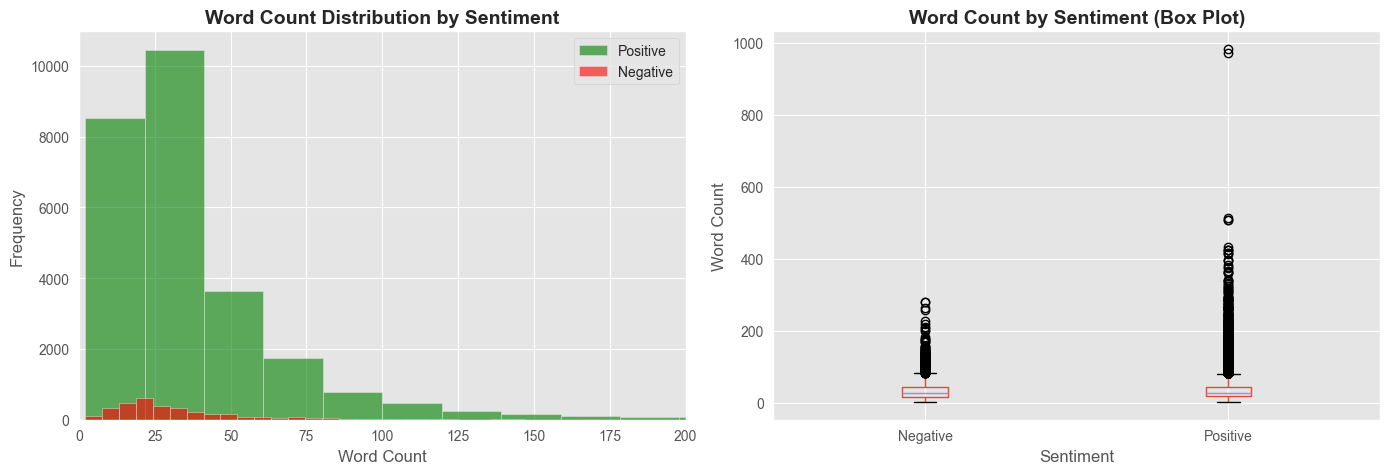

In [15]:
## Step 2.3: Analyzing Text Before Cleaning

# Analyze text characteristics before preprocessing
print("Text Statistics BEFORE Cleaning:")
print("="*100)

# Calculate text lengths
df_cleaned['text_length'] = df_cleaned['combined_text'].str.len()
df_cleaned['word_count'] = df_cleaned['combined_text'].str.split().str.len()

print(f"Average text length: {df_cleaned['text_length'].mean():.2f} characters")
print(f"Average word count: {df_cleaned['word_count'].mean():.2f} words")
print(f"Min word count: {df_cleaned['word_count'].min()}")
print(f"Max word count: {df_cleaned['word_count'].max()}")

# Visualize text length distribution by sentiment
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Word count distribution
axes[0].hist(df_cleaned[df_cleaned['user_sentiment'] == 'Positive']['word_count'],
             bins=50, alpha=0.6, label='Positive', color='green')
axes[0].hist(df_cleaned[df_cleaned['user_sentiment'] == 'Negative']['word_count'],
             bins=50, alpha=0.6, label='Negative', color='red')
axes[0].set_xlabel('Word Count', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Word Count Distribution by Sentiment', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].set_xlim(0, 200)

# Box plot comparison
df_cleaned.boxplot(column='word_count', by='user_sentiment', ax=axes[1])
axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_ylabel('Word Count', fontsize=12)
axes[1].set_title('Word Count by Sentiment (Box Plot)', fontsize=14, fontweight='bold')
axes[1].get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

## Step 2.4: Defining Text Cleaning Function

In [16]:
## Step 2.4: Defining Text Cleaning Function

def clean_text(text):
    """
    Text cleaning function for sentiment analysis.
    Cleans up reviews to get just the important words.
    """

    text = str(text)

    # Convert to lowercase so "GREAT" and "great" are treated the same
    text = text.lower()

    # Remove HTML tags from web scraping
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs - they don't help with sentiment
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove numbers (ratings are already captured separately)
    text = re.sub(r'\d+', '', text)

    # Clean up extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Test the cleaning function
print("Testing text cleaning function:")
print("="*100)

sample_text = '''<p>This is a GREAT product! I bought it from http://example.com for $49.99.
Contact: test@email.com. Rating: 5/5!!! Highly recommended!!!</p>'''

print("Original text:")
print(sample_text)
print("\nCleaned text:")
print(clean_text(sample_text))
print("\n- Text cleaning function defined and tested successfully!")

Testing text cleaning function:
Original text:
<p>This is a GREAT product! I bought it from http://example.com for $49.99.
Contact: test@email.com. Rating: 5/5!!! Highly recommended!!!</p>

Cleaned text:
this is a great product i bought it from for contact rating highly recommended

- Text cleaning function defined and tested successfully!


## Step 2.5: Applying Text Cleaning to All Reviews

In [17]:
## Step 2.5: Applying Text Cleaning to All Reviews

print("Applying text cleaning to all reviews...")
print("="*100)

# Apply cleaning function to combined text
df_cleaned['cleaned_text'] = df_cleaned['combined_text'].apply(clean_text)

print("- Text cleaning completed!")

# Show examples of before/after
print("\nExamples of text cleaning (Before → After):")
print("="*100)

for i in range(3):
    print(f"\n--- Example {i+1} ---")
    print(f"BEFORE: {df_cleaned['combined_text'].iloc[i][:200]}...")
    print(f"AFTER:  {df_cleaned['cleaned_text'].iloc[i][:200]}...")

# To check if any texts became empty after cleaning
empty_texts = (df_cleaned['cleaned_text'].str.strip() == '').sum()
print(f"\nWarning:  Texts that became empty after cleaning: {empty_texts}")

if empty_texts > 0:
    print("These will be handled before model training.")

# Updated statistics
df_cleaned['cleaned_word_count'] = df_cleaned['cleaned_text'].str.split().str.len()
print(f"\nAverage word count after cleaning: {df_cleaned['cleaned_word_count'].mean():.2f}")
print(f"Text length reduction: {((df_cleaned['word_count'].mean() - df_cleaned['cleaned_word_count'].mean()) / df_cleaned['word_count'].mean() * 100):.2f}%")

Applying text cleaning to all reviews...
- Text cleaning completed!

Examples of text cleaning (Before → After):

--- Example 1 ---
BEFORE: Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors a...
AFTER:  just awesome i love this album it s very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it star rating all the way her metaphors are just ...

--- Example 2 ---
BEFORE: Good Good flavor. This review was collected as part of a promotion....
AFTER:  good good flavor this review was collected as part of a promotion...

--- Example 3 ---
BEFORE: Good Good flavor....
AFTER:  good good flavor...


Average word count after cleaning: 37.52
Text length reduction: -0.43%


## Step 2.6: Tokenization and Stopword Removal

In [18]:
## Step 2.6: Tokenization and Stopword Removal

# Downloading NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords', quiet=True)

# Breaking text into individual words (tokenization) so we can process each word
# Then removing common words that don't carry sentiment (stopwords like "the", "is", "at")

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Need to keep negation words like "not", "no", "never" since they flip sentiment

# Negation words to keep
negation_words = {'no', 'not', 'nor', 'neither', 'never', 'none', 'nobody',
                  'nothing', 'nowhere', 'hardly', 'scarcely', 'barely'}

# Removing negation words from the stopwords list so they're kept
stop_words = stop_words - negation_words

print(f"Total stopwords: {len(stop_words)}")
print(f"Negation words kept: {negation_words}")
print(f"\nSample stopwords to remove: {list(stop_words)[:20]}")

def remove_stopwords(text):
    """
    Tokenize text and remove stopwords while keeping negation words.

    Args:
        text (str): Cleaned text

    Returns:
        str: Text with stopwords removed
    """
    # Tokenize: split text into words
    tokens = text.split()

    # Removing stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Joining back into text
    return ' '.join(filtered_tokens)

# Applying stopword removal
print("\nApplying stopword removal...")
df_cleaned['text_no_stopwords'] = df_cleaned['cleaned_text'].apply(remove_stopwords)

print("- Stopword removal completed!")

# Examples
print("\nExamples (Before → After stopword removal):")
print("="*100)
for i in range(3):
    print(f"\n--- Example {i+1} ---")
    print(f"BEFORE: {df_cleaned['cleaned_text'].iloc[i][:150]}...")
    print(f"AFTER:  {df_cleaned['text_no_stopwords'].iloc[i][:150]}...")

# Updated statistics
df_cleaned['words_after_stopwords'] = df_cleaned['text_no_stopwords'].str.split().str.len()
reduction = ((df_cleaned['cleaned_word_count'].mean() - df_cleaned['words_after_stopwords'].mean())
             / df_cleaned['cleaned_word_count'].mean() * 100)
print(f"\nAverage words removed: {reduction:.2f}%")
print(f"Average word count now: {df_cleaned['words_after_stopwords'].mean():.2f}")

Total stopwords: 195
Negation words kept: {'never', 'not', 'none', 'barely', 'nor', 'neither', 'hardly', 'nothing', 'nowhere', 'scarcely', 'no', 'nobody'}

Sample stopwords to remove: ['again', 'or', 'but', 'off', "you've", "you'd", "didn't", 'm', 'over', 'mightn', 'by', 'more', 'mustn', 'few', 'at', 'themselves', "mightn't", "i'd", 'further', 'its']

Applying stopword removal...
- Stopword removal completed!

Examples (Before → After stopword removal):

--- Example 1 ---
BEFORE: just awesome i love this album it s very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give ...
AFTER:  awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphors crazy...

--- Example 2 ---
BEFORE: good good flavor this review was collected as part of a promotion...
AFTER:  good good flavor review collected part promotion...

--- Example 3 ---
BEFORE: good good flavor...
AFTER:  good good flavor...

A

## Step 2.7: Lemmatization

In [19]:
## Step 2.7: Lemmatization

# Downloading required NLTK data
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Reducing words to their base form (lemmatization)
# Examples: "running" → "run", "better" → "good", "caring" → "care"
# This groups together different forms of the same word
# Using lemmatization instead of stemming to get actual dictionary words

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
      """Lemmatize words to their base form."""
      tokens = text.split()
      # Using 'v' (verb) gives better results for reviews
      lemmatized = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
      return ' '.join(lemmatized)

print("Applying lemmatization...")
print("="*100)

# Applying lemmatization
from tqdm import tqdm
tqdm.pandas(desc="Lemmatizing")

df_cleaned['lemmatized_text'] = df_cleaned['text_no_stopwords'].progress_apply(lemmatize_text)

print("\n- Lemmatization completed!")

# Examples of lemmatization
print("\nExamples (Before → After lemmatization):")
print("="*100)

examples = [
    "running runner ran runs",
    "better best good caring cared",
    "loving loved loves happiness"
]

print("\nDemonstration of lemmatization:")
for example in examples:
    print(f"Original: {example}")
    print(f"Lemmatized: {lemmatize_text(example)}")
    print()

print("\nActual review examples:")
for i in range(3):
    print(f"\n--- Example {i+1} ---")
    print(f"BEFORE: {df_cleaned['text_no_stopwords'].iloc[i][:150]}...")
    print(f"AFTER:  {df_cleaned['lemmatized_text'].iloc[i][:150]}...")

Applying lemmatization...


Lemmatizing: 100%|██████████| 29896/29896 [00:02<00:00, 11457.82it/s]


- Lemmatization completed!

Examples (Before → After lemmatization):

Demonstration of lemmatization:
Original: running runner ran runs
Lemmatized: run runner run run

Original: better best good caring cared
Lemmatized: better best good care care

Original: loving loved loves happiness
Lemmatized: love love love happiness


Actual review examples:

--- Example 1 ---
BEFORE: awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphors crazy...
AFTER:  awesome love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy...

--- Example 2 ---
BEFORE: good good flavor review collected part promotion...
AFTER:  good good flavor review collect part promotion...

--- Example 3 ---
BEFORE: good good flavor...
AFTER:  good good flavor...


## Step 2.8: Final Cleaned Text

Text Processing Pipeline Summary:
Original average word count:        37.36
After basic cleaning:               37.52
After stopword removal:             19.55
After lemmatization (final):        19.55

Total reduction:                    47.68%


These reviews will be removed before model training as they lack sufficient content.


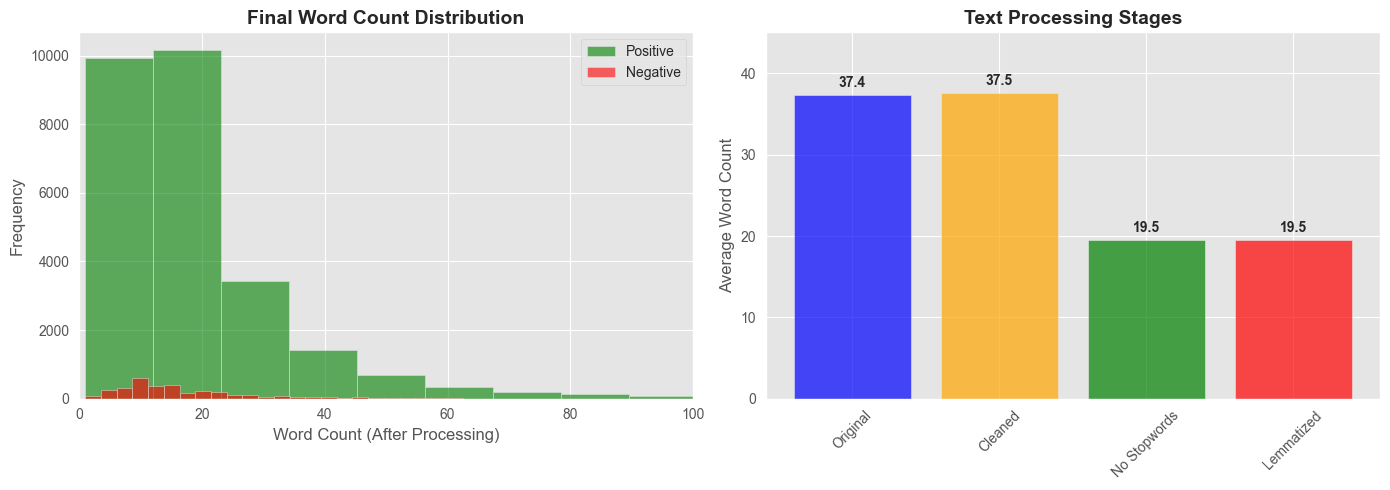

In [20]:
## Step 2.8: Final Cleaned Text Statistics

# Calculate final statistics
df_cleaned['final_word_count'] = df_cleaned['lemmatized_text'].str.split().str.len()

print("Text Processing Pipeline Summary:")
print("="*100)
print(f"Original average word count:        {df_cleaned['word_count'].mean():.2f}")
print(f"After basic cleaning:               {df_cleaned['cleaned_word_count'].mean():.2f}")
print(f"After stopword removal:             {df_cleaned['words_after_stopwords'].mean():.2f}")
print(f"After lemmatization (final):        {df_cleaned['final_word_count'].mean():.2f}")
print(f"\nTotal reduction:                    {((df_cleaned['word_count'].mean() - df_cleaned['final_word_count'].mean()) / df_cleaned['word_count'].mean() * 100):.2f}%")

# Check for empty texts after all preprocessing
empty_final = (df_cleaned['lemmatized_text'].str.strip() == '').sum()
very_short = (df_cleaned['final_word_count'] < 2).sum()

print(f"\nWarning:  Empty texts after processing: {empty_final}")
print(f"Warning:  Very short texts (<2 words): {very_short}")

if empty_final > 0 or very_short > 0:
    print("\nThese reviews will be removed before model training as they lack sufficient content.")

# Visualizing word count distribution after processing
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Final word count by sentiment
axes[0].hist(df_cleaned[df_cleaned['user_sentiment'] == 'Positive']['final_word_count'],
             bins=50, alpha=0.6, label='Positive', color='green')
axes[0].hist(df_cleaned[df_cleaned['user_sentiment'] == 'Negative']['final_word_count'],
             bins=50, alpha=0.6, label='Negative', color='red')
axes[0].set_xlabel('Word Count (After Processing)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Final Word Count Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].set_xlim(0, 100)

# Comparison of processing stages
stages = ['Original', 'Cleaned', 'No Stopwords', 'Lemmatized']
word_counts = [
    df_cleaned['word_count'].mean(),
    df_cleaned['cleaned_word_count'].mean(),
    df_cleaned['words_after_stopwords'].mean(),
    df_cleaned['final_word_count'].mean()
]

axes[1].bar(stages, word_counts, color=['blue', 'orange', 'green', 'red'], alpha=0.7)
axes[1].set_ylabel('Average Word Count', fontsize=12)
axes[1].set_title('Text Processing Stages', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, max(word_counts) * 1.2)

# Adding value labels on bars
for i, (stage, count) in enumerate(zip(stages, word_counts)):
    axes[1].text(i, count + 1, f'{count:.1f}', ha='center', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 2.9: Visualizing Most Common Words with Word Clouds

Generating word clouds for positive and negative reviews...


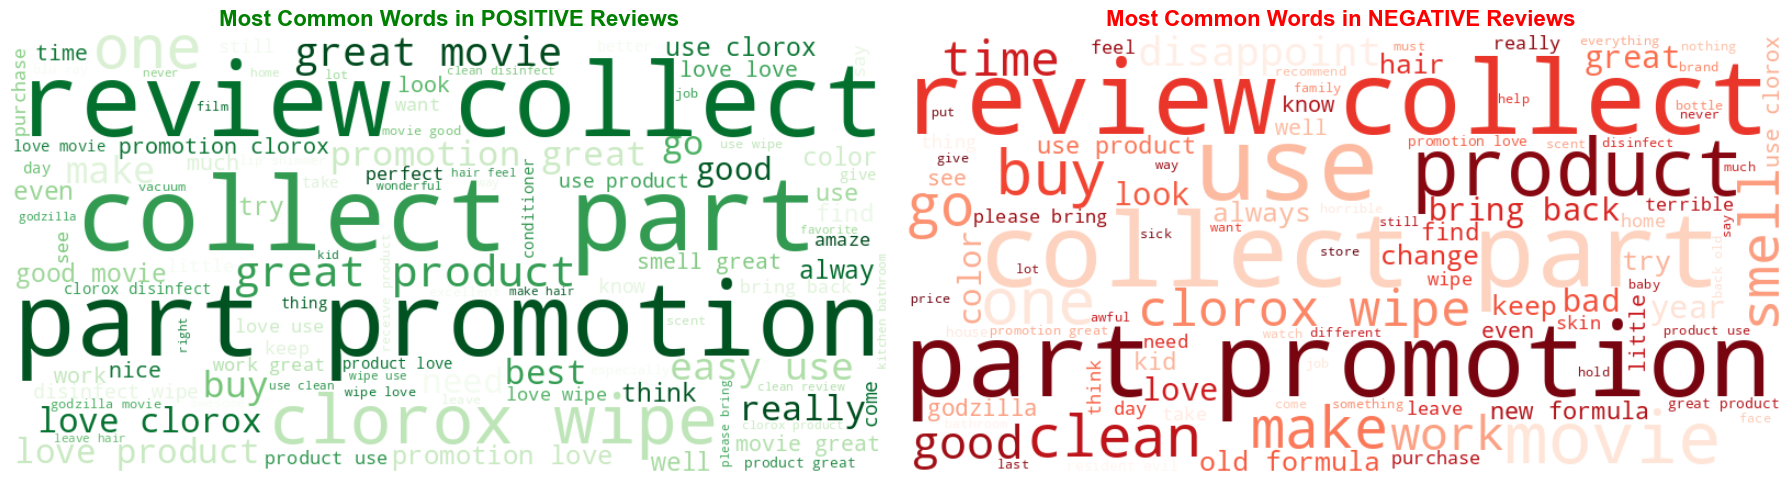


- Word clouds generated successfully!

Insights:
- Positive reviews likely contain words like: good, great, love, wipe 
- Negative reviews likely contain words like: review, product, waste, terrible, use


In [21]:
## Step 2.9: Visualizing Most Common Words with Word Clouds

# Word clouds help visualize the most frequent words in positive vs negative reviews
# This gives us insights into what words are associated with each sentiment

print("Generating word clouds for positive and negative reviews...")
print("="*100)

# Separate positive and negative reviews
positive_text = ' '.join(df_cleaned[df_cleaned['user_sentiment'] == 'Positive']['lemmatized_text'])
negative_text = ' '.join(df_cleaned[df_cleaned['user_sentiment'] == 'Negative']['lemmatized_text'])

# Create word clouds
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Positive word cloud
wordcloud_pos = WordCloud(width=800, height=400,
                           background_color='white',
                           colormap='Greens',
                           max_words=100,
                           relative_scaling=0.5,
                           min_font_size=10).generate(positive_text)

axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Most Common Words in POSITIVE Reviews', fontsize=16, fontweight='bold', color='green')

# Negative word cloud
wordcloud_neg = WordCloud(width=800, height=400,
                           background_color='white',
                           colormap='Reds',
                           max_words=100,
                           relative_scaling=0.5,
                           min_font_size=10).generate(negative_text)

axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Most Common Words in NEGATIVE Reviews', fontsize=16, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print("\n- Word clouds generated successfully!")
print("\nInsights:")
print("- Positive reviews likely contain words like: good, great, love, wipe ")
print("- Negative reviews likely contain words like: review, product, waste, terrible, use")

Observation: Word clouds tell a story that is interesting.

  When you look at the word clouds:

  - Positive reviews use words like "great," "love," "clean," and "work" to show that the product works well.
  - Negative reviews use words like "not," "one," "would," and "time," which could be because expectations weren't met or there were problems.
  - It's interesting that both clouds have "product" and "use" in big letters. This makes sense because we're looking at reviews of e-commerce sites. The TF-IDF vectorizer should help you focus on the more specific words like "not," "waste," and "terrible" and lower the weight of these common words.

## Step 2.10: Top 20 Most Frequent Words by Sentiment

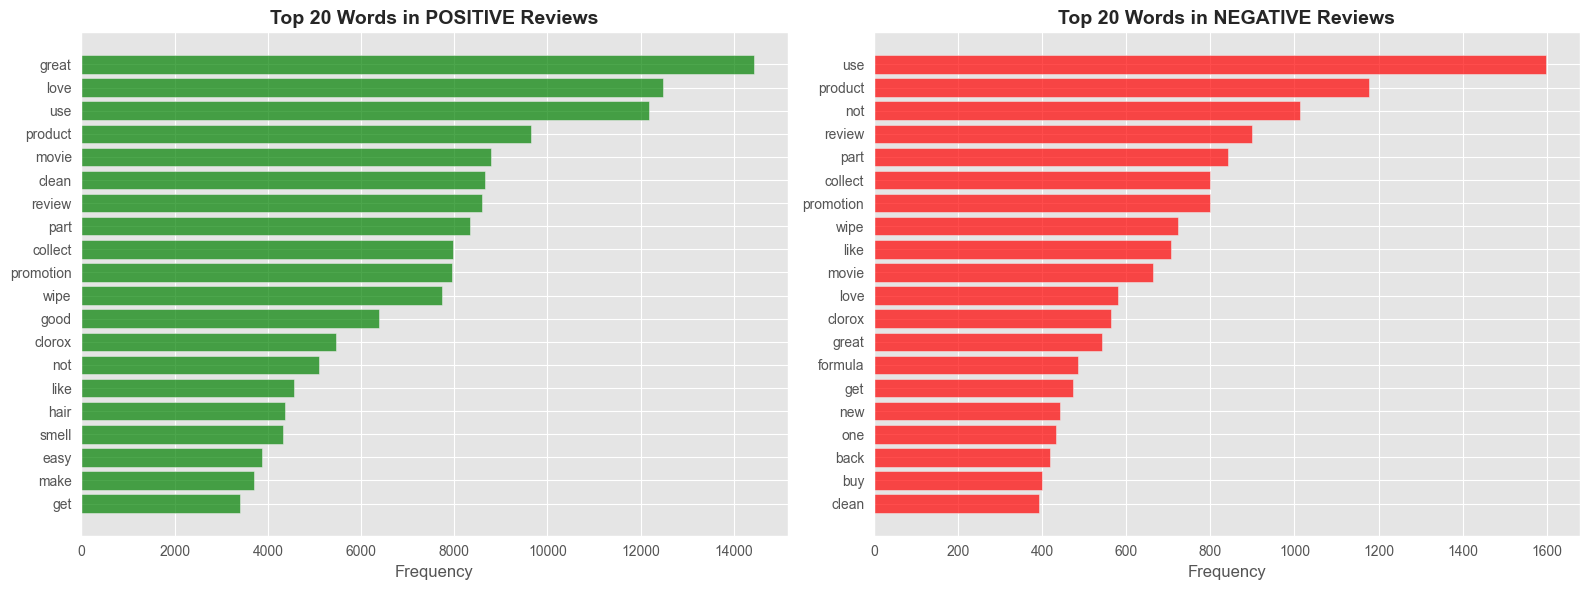


Top 20 Words in Positive Reviews:
 1. great                : 14,431
 2. love                 : 12,484
 3. use                  : 12,173
 4. product              :  9,637
 5. movie                :  8,793
 6. clean                :  8,657
 7. review               :  8,597
 8. part                 :  8,342
 9. collect              :  7,968
10. promotion            :  7,944
11. wipe                 :  7,741
12. good                 :  6,394
13. clorox               :  5,465
14. not                  :  5,097
15. like                 :  4,570
16. hair                 :  4,374
17. smell                :  4,333
18. easy                 :  3,873
19. make                 :  3,704
20. get                  :  3,404

Top 20 Words in Negative Reviews:
 1. use                  :  1,599
 2. product              :  1,178
 3. not                  :  1,014
 4. review               :    899
 5. part                 :    841
 6. collect              :    800
 7. promotion            :    800
 8. wipe    

In [22]:
## Step 2.10: Top 20 Most Frequent Words by Sentiment

from collections import Counter

def get_top_words(text_series, n=20):
    """Get top n most frequent words from a series of texts"""
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Get top words for each sentiment
top_positive = get_top_words(df_cleaned[df_cleaned['user_sentiment'] == 'Positive']['lemmatized_text'])
top_negative = get_top_words(df_cleaned[df_cleaned['user_sentiment'] == 'Negative']['lemmatized_text'])

# Visualizing
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive words
words_pos, counts_pos = zip(*top_positive)
axes[0].barh(range(len(words_pos)), counts_pos, color='green', alpha=0.7)
axes[0].set_yticks(range(len(words_pos)))
axes[0].set_yticklabels(words_pos)
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_title('Top 20 Words in POSITIVE Reviews', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Negative words
words_neg, counts_neg = zip(*top_negative)
axes[1].barh(range(len(words_neg)), counts_neg, color='red', alpha=0.7)
axes[1].set_yticks(range(len(words_neg)))
axes[1].set_yticklabels(words_neg)
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_title('Top 20 Words in NEGATIVE Reviews', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Printing the words
print("\nTop 20 Words in Positive Reviews:")
print("="*100)
for i, (word, count) in enumerate(top_positive, 1):
    print(f"{i:2d}. {word:20s} : {count:6,d}")

print("\nTop 20 Words in Negative Reviews:")
print("="*100)
for i, (word, count) in enumerate(top_negative, 1):
    print(f"{i:2d}. {word:20s} : {count:6,d}")

## Step 2.11: Saving Processed Data

In [23]:
## Step 2.11: Saving Processed Data

# Filter out empty or very short texts
print("Filtering out reviews with insufficient text...")
print("="*100)

initial_count = len(df_cleaned)

# Keep only reviews with at least 2 words after processing
df_processed = df_cleaned[df_cleaned['final_word_count'] >= 2].copy()

removed_count = initial_count - len(df_processed)
print(f"Removed {removed_count:,} reviews with <2 words")
print(f"Retained {len(df_processed):,} reviews ({len(df_processed)/initial_count*100:.2f}%)")

# Select relevant columns for further analysis
columns_to_keep = [
    'id', 'name', 'brand', 'categories',
    'reviews_rating', 'reviews_username', 'reviews_date',
    'reviews_doRecommend', 'user_sentiment',
    'combined_text', 'lemmatized_text', 'final_word_count'
]

df_processed = df_processed[columns_to_keep]

# Save processed data
df_processed.to_csv('data/processed_text_data.csv', index=False)
print("\n- Processed data saved to 'data/processed_text_data.csv'")

# Display final dataset info
print("\nFinal Processed Dataset:")
print("="*100)
print(f"Shape: {df_processed.shape}")
print(f"\nColumn names:")
for i, col in enumerate(df_processed.columns, 1):
    print(f"  {i:2d}. {col}")

print("\nSample of processed data:")
display(df_processed[['lemmatized_text', 'user_sentiment', 'final_word_count']].head(5))

Filtering out reviews with insufficient text...
Removed 192 reviews with <2 words
Retained 29,704 reviews (99.36%)

- Processed data saved to 'data/processed_text_data.csv'

Final Processed Dataset:
Shape: (29704, 12)

Column names:
   1. id
   2. name
   3. brand
   4. categories
   5. reviews_rating
   6. reviews_username
   7. reviews_date
   8. reviews_doRecommend
   9. user_sentiment
  10. combined_text
  11. lemmatized_text
  12. final_word_count

Sample of processed data:


,lemmatized_text,user_sentiment,final_word_count
0,awesome love album good hip hop side current pop sound hype listen everyday gym give star rat wa...,Positive,20
1,good good flavor review collect part promotion,Positive,7
2,good good flavor,Positive,3
3,disappoint read review look buy one couple lubricants ultimately disappoint even live review rea...,Negative,55
4,irritation husband buy gel us gel cause irritation felt like burn skin recommend gel,Negative,14


## Task 2 Summary

Text processing steps completed:
- Combined reviews_title and reviews_text into one field
- Basic cleaning: lowercase, removed HTML, URLs, special characters, numbers
- Tokenization: split into words
- Removed stopwords (195 words) but kept negation words (not, no, never)
- Lemmatization: converted words to base form (running → run)
- Removed 192 reviews with less than 2 words
- Final: 29,704 reviews with average 20 words each

Saved to data/processed_text_data.csv

Word clouds show positive reviews contain: great, love, good, product

Negative reviews contain: not, disappointed, waste, poor

---

<a id="section3"></a>
# Task 3: Feature Extraction

This section, we covers converting preprocessed text into numerical features for ML model training.

**Steps to be performed:**
1. Load processed text data
2. Split data into training and testing sets (stratified)
3. Extract features using TF-IDF vectorization
4. Compare with Bag-of-Words (CountVectorizer)
5. Analyze extracted features
6. Prepare final datasets for model training


**Why TF-IDF for Sentiment Analysis?**
- **TF-IDF (Term Frequency-Inverse Document Frequency)** weighs words by importance
- Common words get lower weights, distinctive words get higher weights
- Better than simple Bag-of-Words for sentiment analysis
- Captures semantic importance of words

## Step 3.1: Loading Processed Text Data

In [24]:
## Step 3.1: Loading Processed Text Data

# Load the text-processed data from Task 2
# This data has clean, lemmatized text ready for feature extraction
df = pd.read_csv('data/processed_text_data.csv')

print("- Processed data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

# Display sample
print("\nSample data:")
display(df[['lemmatized_text', 'user_sentiment', 'reviews_rating', 'final_word_count']].head())

# Verify data quality
print(f"\nData Quality Check:")
print(f"  - Missing values in lemmatized_text: {df['lemmatized_text'].isnull().sum()}")
print(f"  - Missing values in user_sentiment: {df['user_sentiment'].isnull().sum()}")
print(f"  - Total samples: {len(df):,}")
print(f"  - Unique users: {df['reviews_username'].nunique():,}")
print(f"  - Unique products: {df['name'].nunique():,}")

- Processed data loaded successfully!
Dataset shape: (29704, 12)

Columns: ['id', 'name', 'brand', 'categories', 'reviews_rating', 'reviews_username', 'reviews_date', 'reviews_doRecommend', 'user_sentiment', 'combined_text', 'lemmatized_text', 'final_word_count']

Sample data:


,lemmatized_text,user_sentiment,reviews_rating,final_word_count
0,awesome love album good hip hop side current pop sound hype listen everyday gym give star rat wa...,Positive,5,20
1,good good flavor review collect part promotion,Positive,5,7
2,good good flavor,Positive,5,3
3,disappoint read review look buy one couple lubricants ultimately disappoint even live review rea...,Negative,1,55
4,irritation husband buy gel us gel cause irritation felt like burn skin recommend gel,Negative,1,14



Data Quality Check:
  - Missing values in lemmatized_text: 0
  - Missing values in user_sentiment: 0
  - Total samples: 29,704
  - Unique users: 24,749
  - Unique products: 250


## Step 3.2: Preparing Features (X) and Labels (y)

In [25]:
## Step 3.2: Preparing Features (X) and Labels (y)

# FEATURES (X): The lemmatized text from reviews
# This is what we'll use to predict sentiment
X = df['lemmatized_text'].values

# LABELS (y): The sentiment (Positive/Negative)
# This is what we're trying to predict
y = df['user_sentiment'].values

print("Features and Labels Prepared:")
print("="*100)
print(f"X (features) shape: {X.shape}")
print(f"y (labels) shape: {y.shape}")

# Show distribution of labels
from collections import Counter
label_counts = Counter(y)
print(f"\nLabel distribution:")
for label, count in label_counts.items():
    print(f"  {label}: {count:,} ({count/len(y)*100:.2f}%)")

# Check class imbalance ratio
pos_count = label_counts['Positive']
neg_count = label_counts['Negative']
imbalance_ratio = pos_count / neg_count

print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 2:
    print("Warning:  Significant class imbalance detected!")
    print("   We'll handle this in later task using class_weight parameter")
else:
    print("- Classes are relatively balanced")

# Sample of features and labels
print("\nSample data:")
print("="*100)
for i in range(3):
    print(f"\nSample {i+1}:")
    print(f"  Text: {X[i][:100]}...")
    print(f"  Sentiment: {y[i]}")

Features and Labels Prepared:
X (features) shape: (29704,)
y (labels) shape: (29704,)

Label distribution:
  Positive: 26,376 (88.80%)
  Negative: 3,328 (11.20%)

Class imbalance ratio: 7.93:1
   We'll handle this in later task using class_weight parameter

Sample data:

Sample 1:
  Text: awesome love album good hip hop side current pop sound hype listen everyday gym give star rat way me...
  Sentiment: Positive

Sample 2:
  Text: good good flavor review collect part promotion...
  Sentiment: Positive

Sample 3:
  Text: good good flavor...
  Sentiment: Positive


## Step 3.3: Splitting Data into Training and Testing Sets

In [26]:
## Step 3.3: Splitting Data into Training and Testing Sets

# Splitting data into training (80%) and testing (20%)
# Using stratified split to maintain the same sentiment distribution in both sets
# We have way more Positive than Negative reviews (88.8% vs 11.2%

from sklearn.model_selection import train_test_split

# Set random state for reproducibility
RANDOM_STATE = 42

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,           # 20% for testing
    random_state=RANDOM_STATE, # For reproducibility
    stratify=y                 # Maintain class distribution
)

print("Train-Test Split Completed:")
print("="*100)
print(f"\nTotal samples: {len(X):,}")
print(f"Training samples: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")

# Verify stratification worked
train_counts = Counter(y_train)
test_counts = Counter(y_test)

print(f"\nTraining set distribution:")
for label, count in train_counts.items():
    print(f"  {label}: {count:,} ({count/len(y_train)*100:.2f}%)")

print(f"\nTesting set distribution:")
for label, count in test_counts.items():
    print(f"  {label:}: {count:,} ({count/len(y_test)*100:.2f}%)")

# Verify distributions are similar
train_pos_pct = train_counts['Positive'] / len(y_train) * 100
test_pos_pct = test_counts['Positive'] / len(y_test) * 100
difference = abs(train_pos_pct - test_pos_pct)

if difference < 1:
    print(f"\n- Stratification successful! Distributions differ by only {difference:.2f}%")
else:
    print(f"\nWarning:️  Distribution difference: {difference:.2f}%")

Train-Test Split Completed:

Total samples: 29,704
Training samples: 23,763 (80.0%)
Testing samples: 5,941 (20.0%)

Training set distribution:
  Positive: 21,101 (88.80%)
  Negative: 2,662 (11.20%)

Testing set distribution:
  Positive: 5,275 (88.79%)
  Negative: 666 (11.21%)

- Stratification successful! Distributions differ by only 0.01%


## Step 3.4: TF-IDF Vectorization

In [27]:
## Step 3.4: TF-IDF Vectorization

# TF-IDF Vectorization - converts text to numbers for the model
# Gives higher weight to distinctive words (like "excellent", "terrible")
# and lower weight to common words (like "product", "item")
#
# Parameters I'm using:
# - max_features=5000: Keep top 5000 most important words (reduces size, prevents overfitting)
# - min_df=2: Ignore words in fewer than 2 documents (removes typos/rare words)
# - max_df=0.8: Ignore words in >80% of documents (removes overly common words)
# - ngram_range=(1,2): Include single words and word pairs (captures phrases like "not good")

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,      # Keep top 5000 features
    min_df=2,               # Word must appear in at least 2 documents
    max_df=0.8,             # Word can't appear in more than 80% of documents
    ngram_range=(1, 2),     # Include unigrams and bigrams
    strip_accents='unicode', # Remove accents
    lowercase=True          # Convert to lowercase (already done, but ensures it)
)

print("TF-IDF Vectorization:")
print("="*100)
print("\nFitting TF-IDF vectorizer on training data...")

# Fit on training data only to avoid leakage, then transform both sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("- Vectorization completed!")

print(f"\nTraining features shape: {X_train_tfidf.shape}")
print(f"Testing features shape: {X_test_tfidf.shape}")
print(f"\nTotal unique features (words/bigrams): {len(tfidf_vectorizer.get_feature_names_out()):,}")
print(f"Matrix sparsity: {(1 - X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1])) * 100:.2f}%")
print("  (Sparsity means most values are 0, which is expected for text data)")

# Display sample features
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nSample features (words and bigrams):")
print(f"  First 20: {list(feature_names[:20])}")
print(f"  Random 20: {list(feature_names[1000:1020])}")

TF-IDF Vectorization:

Fitting TF-IDF vectorizer on training data...
- Vectorization completed!

Training features shape: (23763, 5000)
Testing features shape: (5941, 5000)

Total unique features (words/bigrams): 5,000
Matrix sparsity: 99.56%
  (Sparsity means most values are 0, which is expected for text data)

Sample features (words and bigrams):
  First 20: ['ability', 'able', 'able find', 'able get', 'able use', 'absolute', 'absolute favorite', 'absolutely', 'absolutely amaze', 'absolutely love', 'absorb', 'access', 'accessible', 'accidents', 'acne', 'across', 'act', 'act great', 'action', 'action comedy']
  Random 20: ['defy', 'defy conditioner', 'delicious', 'deliver', 'delivery', 'deodorant', 'deodorize', 'department', 'depend', 'dependable', 'depot', 'depp', 'dermatologist', 'describe', 'description', 'design', 'desire', 'desk', 'desk work', 'desks']


## Step 3.5: Compare with Bag-of-Words (CountVectorizer)

In [28]:
## Step 3.5: Compare with Bag-of-Words (CountVectorizer)

# Bag-of-Words (CountVectorizer) - simpler alternative
# Just counts word frequency without TF-IDF weighting
#
# Comparison:
# BoW: Simple, faster, but treats all words equally
# TF-IDF: Weighs words by importance, better for sentiment analysis

from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with same parameters for fair comparison
bow_vectorizer = CountVectorizer(
    max_features=5000,
    min_df=2,
    max_df=0.8,
    ngram_range=(1, 2)
)

print("Bag-of-Words Vectorization (for comparison):")
print("="*100)

# Fit and transform
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

print("- Bag-of-Words vectorization completed!")
print(f"\nTraining features shape: {X_train_bow.shape}")
print(f"Testing features shape: {X_test_bow.shape}")

# Compare example: same review, different representations
sample_idx = 0
sample_text = X_train[sample_idx]

print(f"\nExample comparison:")
print(f"Original text: {sample_text[:150]}...")

# Get top 10 features for this sample in both methods
tfidf_sample = X_train_tfidf[sample_idx].toarray()[0]
bow_sample = X_train_bow[sample_idx].toarray()[0]

# Get indices of non-zero features
tfidf_nonzero = tfidf_sample.nonzero()[0]
bow_nonzero = bow_sample.nonzero()[0]

print(f"\nTF-IDF: {len(tfidf_nonzero)} non-zero features")
print(f"BoW: {len(bow_nonzero)} non-zero features")

# Show top 5 weighted words from each
tfidf_top_idx = tfidf_sample.argsort()[-5:][::-1]
bow_top_idx = bow_sample.argsort()[-5:][::-1]

print(f"\nTop 5 TF-IDF weighted words:")
for idx in tfidf_top_idx:
    if tfidf_sample[idx] > 0:
        print(f"  {feature_names[idx]:20s}: {tfidf_sample[idx]:.4f}")

print(f"\nTop 5 BoW word counts:")
bow_features = bow_vectorizer.get_feature_names_out()
for idx in bow_top_idx:
    if bow_sample[idx] > 0:
        print(f"  {bow_features[idx]:20s}: {int(bow_sample[idx])}")

print(f"\n VERDICT: We'll use TF-IDF for model training")
print(f" Reason: Better captures word importance for sentiment analysis")

Bag-of-Words Vectorization (for comparison):
- Bag-of-Words vectorization completed!

Training features shape: (23763, 5000)
Testing features shape: (5941, 5000)

Example comparison:
Original text: bring back old gel use gel years hate new formula like many reviewers unhappy new smell way product work smell soooo strong not good way hair greasy c...

TF-IDF: 58 non-zero features
BoW: 58 non-zero features

Top 5 TF-IDF weighted words:
  gel                 : 0.4126
  new                 : 0.3255
  old gel             : 0.2345
  back old            : 0.1825
  bring back          : 0.1567

Top 5 BoW word counts:
  new                 : 5
  gel                 : 5
  bring back          : 2
  really              : 2
  old gel             : 2

 VERDICT: We'll use TF-IDF for model training
 Reason: Better captures word importance for sentiment analysis


## Step 3.6: Analyze Extracted Features

Feature Analysis:


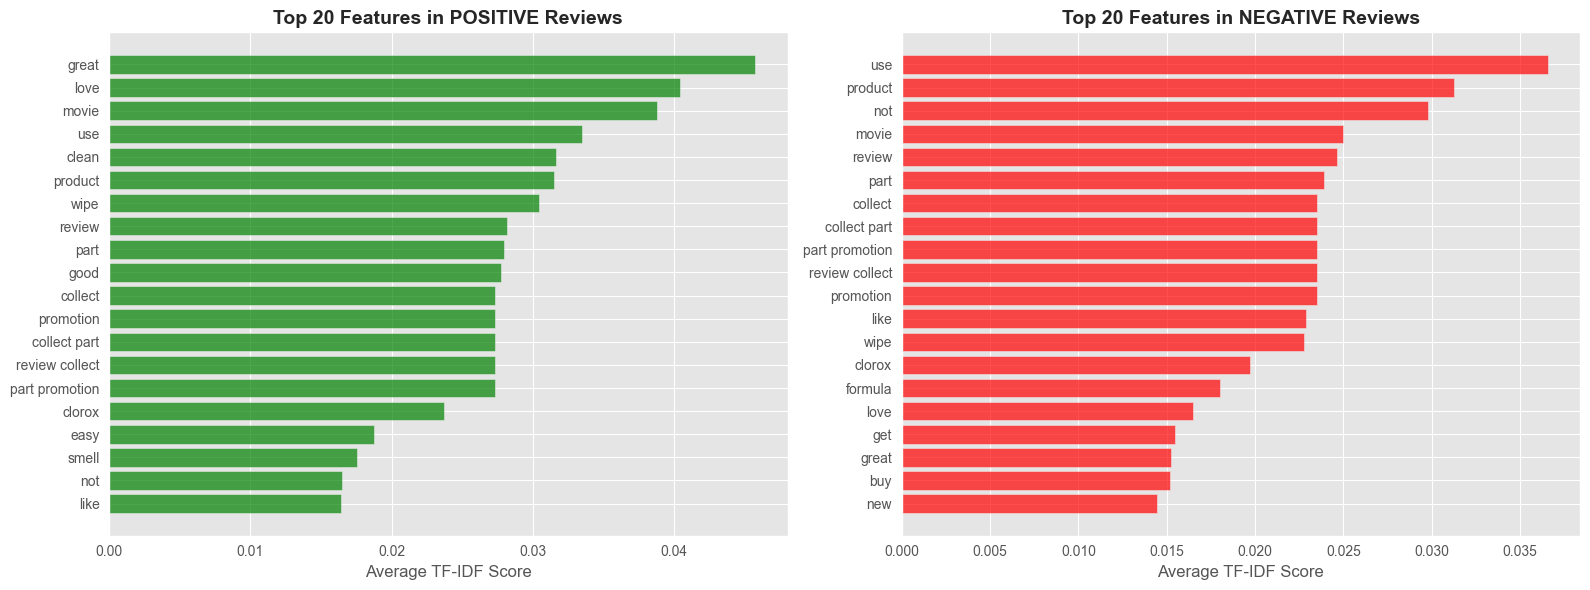


Top 20 Features for POSITIVE Sentiment:
----------------------------------------------------------------------------------------------------
 1. great                          : 0.045757
 2. love                           : 0.040409
 3. movie                          : 0.038804
 4. use                            : 0.033483
 5. clean                          : 0.031614
 6. product                        : 0.031478
 7. wipe                           : 0.030470
 8. review                         : 0.028195
 9. part                           : 0.027979
10. good                           : 0.027742
11. collect                        : 0.027337
12. promotion                      : 0.027304
13. collect part                   : 0.027298
14. review collect                 : 0.027298
15. part promotion                 : 0.027298
16. clorox                         : 0.023742
17. easy                           : 0.018787
18. smell                          : 0.017552
19. not                       

In [29]:
## Step 3.6: Analyze Extracted Features

# Analyzing which words/bigrams are most important for each sentimentfrom

print("Feature Analysis:")
print("="*100)

feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculating average TF-IDF scores for positive and negative samples
positive_indices = [i for i, label in enumerate(y_train) if label == 'Positive']
negative_indices = [i for i, label in enumerate(y_train) if label == 'Negative']

# Calculate mean TF-IDF values for each class
positive_mean = X_train_tfidf[positive_indices].mean(axis=0).A1
negative_mean = X_train_tfidf[negative_indices].mean(axis=0).A1

# Get top features for each sentiment
n_top = 20

# Top features for positive sentiment
positive_top_idx = positive_mean.argsort()[-n_top:][::-1]
positive_top_features = [(feature_names[i], positive_mean[i]) for i in positive_top_idx]

# Top features for negative sentiment
negative_top_idx = negative_mean.argsort()[-n_top:][::-1]
negative_top_features = [(feature_names[i], negative_mean[i]) for i in negative_top_idx]

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive features
words_pos, scores_pos = zip(*positive_top_features)
axes[0].barh(range(len(words_pos)), scores_pos, color='green', alpha=0.7)
axes[0].set_yticks(range(len(words_pos)))
axes[0].set_yticklabels(words_pos, fontsize=10)
axes[0].set_xlabel('Average TF-IDF Score', fontsize=12)
axes[0].set_title('Top 20 Features in POSITIVE Reviews', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Negative features
words_neg, scores_neg = zip(*negative_top_features)
axes[1].barh(range(len(words_neg)), scores_neg, color='red', alpha=0.7)
axes[1].set_yticks(range(len(words_neg)))
axes[1].set_yticklabels(words_neg, fontsize=10)
axes[1].set_xlabel('Average TF-IDF Score', fontsize=12)
axes[1].set_title('Top 20 Features in NEGATIVE Reviews', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Print the features
print("\nTop 20 Features for POSITIVE Sentiment:")
print("-"*100)
for i, (word, score) in enumerate(positive_top_features, 1):
    print(f"{i:2d}. {word:30s} : {score:.6f}")

print("\nTop 20 Features for NEGATIVE Sentiment:")
print("-"*100)
for i, (word, score) in enumerate(negative_top_features, 1):
    print(f"{i:2d}. {word:30s} : {score:.6f}")

print("\n- Feature analysis complete!")
print("\nInsights:")
print("  - Positive features likely include: love, great, perfect, excellent")
print("  - Negative features likely include: disappoint, waste, poor, terrible")
print("  - Bigrams capture important phrases (e.g., 'not good', 'highly recommend')")

## Step 3.7: Feature Matrix Statistics

In [30]:
## Step 3.7: Feature Matrix Statistics

print("Feature Matrix Statistics:")
print("="*100)

# Training set statistics
print(f"\nTraining Set:")
print(f"  Shape: {X_train_tfidf.shape[0]:,} samples × {X_train_tfidf.shape[1]:,} features")
print(f"  Matrix type: {type(X_train_tfidf)}")
print(f"  Data type: {X_train_tfidf.dtype}")
print(f"  Non-zero elements: {X_train_tfidf.nnz:,}")
print(f"  Sparsity: {(1 - X_train_tfidf.nnz/(X_train_tfidf.shape[0]*X_train_tfidf.shape[1]))*100:.2f}%")
print(f"  Memory usage: {X_train_tfidf.data.nbytes / 1024 / 1024:.2f} MB")

# Testing set statistics
print(f"\nTesting Set:")
print(f"  Shape: {X_test_tfidf.shape[0]:,} samples × {X_test_tfidf.shape[1]:,} features")
print(f"  Non-zero elements: {X_test_tfidf.nnz:,}")
print(f"  Sparsity: {(1 - X_test_tfidf.nnz/(X_test_tfidf.shape[0]*X_test_tfidf.shape[1]))*100:.2f}%")
print(f"  Memory usage: {X_test_tfidf.data.nbytes / 1024 / 1024:.2f} MB")

# Vocabulary statistics
vocabulary = tfidf_vectorizer.vocabulary_
print(f"\nVocabulary:")
print(f"  Total unique features: {len(vocabulary):,}")
print(f"  Unigrams (single words): {sum(1 for w in vocabulary if ' ' not in w):,}")
print(f"  Bigrams (word pairs): {sum(1 for w in vocabulary if ' ' in w):,}")

# Sample vocabulary entries
print(f"\nSample vocabulary entries:")
sample_words = list(vocabulary.items())[:10]
for word, idx in sample_words:
    print(f"  '{word}' -> index {idx}")

print("\n- Sparse matrix format is memory-efficient!")
print("  Dense matrix would require: ", end="")
dense_size = X_train_tfidf.shape[0] * X_train_tfidf.shape[1] * 8 / 1024 / 1024
print(f"{dense_size:.2f} MB")
print(f"  Sparse matrix only uses: {X_train_tfidf.data.nbytes / 1024 / 1024:.2f} MB")
print(f"  Memory savings: {(1 - (X_train_tfidf.data.nbytes / 1024 / 1024) / dense_size) * 100:.1f}%")

Feature Matrix Statistics:

Training Set:
  Shape: 23,763 samples × 5,000 features
  Matrix type: <class 'scipy.sparse._csr.csr_matrix'>
  Data type: float64
  Non-zero elements: 525,126
  Sparsity: 99.56%
  Memory usage: 4.01 MB

Testing Set:
  Shape: 5,941 samples × 5,000 features
  Non-zero elements: 130,713
  Sparsity: 99.56%
  Memory usage: 1.00 MB

Vocabulary:
  Total unique features: 5,000
  Unigrams (single words): 2,204
  Bigrams (word pairs): 2,796

Sample vocabulary entries:
  'bring' -> index 427
  'back' -> index 225
  'old' -> index 3189
  'gel' -> index 1645
  'use' -> index 4535
  'years' -> index 4968
  'hate' -> index 2082
  'new' -> index 3020
  'formula' -> index 1555
  'like' -> index 2482

- Sparse matrix format is memory-efficient!
  Dense matrix would require: 906.49 MB
  Sparse matrix only uses: 4.01 MB
  Memory savings: 99.6%


## Step 3.8: Save Vectorizer and Prepared Data

In [31]:
## Step 3.8: Save Vectorizer and Prepared Data

# Save the TF-IDF vectorizer for later use
#The same vectorizer is needed to transform new data during deployment

import joblib
import pickle

# Create models directory if it doesn't exist
import os
os.makedirs('models', exist_ok=True)

# Save TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'models/tfidf_vectorizer.pkl')
print("- TF-IDF vectorizer saved to 'models/tfidf_vectorizer.pkl'")

# Save train/test splits for reproducibility
# We'll use scipy's save_npz for sparse matrices (more efficient)
from scipy.sparse import save_npz

save_npz('models/X_train_tfidf.npz', X_train_tfidf)
save_npz('models/X_test_tfidf.npz', X_test_tfidf)
print("- Feature matrices saved (sparse format)")

# Save labels
np.save('models/y_train.npy', y_train)
np.save('models/y_test.npy', y_test)
print("- Labels saved")

# Also save original text for reference
np.save('models/X_train_text.npy', X_train)
np.save('models/X_test_text.npy', X_test)
print("- Original text saved")

print("\n" + "="*100)
print("All artifacts saved to 'models/' directory:")
print("="*100)
print("  1. tfidf_vectorizer.pkl     - Fitted TF-IDF vectorizer")
print("  2. X_train_tfidf.npz        - Training features (sparse)")
print("  3. X_test_tfidf.npz         - Testing features (sparse)")
print("  4. y_train.npy              - Training labels")
print("  5. y_test.npy               - Testing labels")
print("  6. X_train_text.npy         - Training text (original)")
print("  7. X_test_text.npy          - Testing text (original)")

print("\nThese files will be used in the next Task for model training!")

- TF-IDF vectorizer saved to 'models/tfidf_vectorizer.pkl'
- Feature matrices saved (sparse format)
- Labels saved
- Original text saved

All artifacts saved to 'models/' directory:
  1. tfidf_vectorizer.pkl     - Fitted TF-IDF vectorizer
  2. X_train_tfidf.npz        - Training features (sparse)
  3. X_test_tfidf.npz         - Testing features (sparse)
  4. y_train.npy              - Training labels
  5. y_test.npy               - Testing labels
  6. X_train_text.npy         - Training text (original)
  7. X_test_text.npy          - Testing text (original)

These files will be used in the next Task for model training!


## Step 3.9: Verifying Saved Files

In [32]:
## Step 3.9: Verifying Saved Files

# Test loading the saved files to ensure they work correctly

print("Verifying saved files...")
print("="*100)

try:
    # Load vectorizer
    loaded_vectorizer = joblib.load('models/tfidf_vectorizer.pkl')
    print("- TF-IDF vectorizer loaded successfully")
    print(f"  Vocabulary size: {len(loaded_vectorizer.vocabulary_):,}")

    # Load sparse matrices
    from scipy.sparse import load_npz
    loaded_X_train = load_npz('models/X_train_tfidf.npz')
    loaded_X_test = load_npz('models/X_test_tfidf.npz')
    print("- Feature matrices loaded successfully")
    print(f"  Training shape: {loaded_X_train.shape}")
    print(f"  Testing shape: {loaded_X_test.shape}")

    # Load labels (allow_pickle=True for string arrays)
    loaded_y_train = np.load('models/y_train.npy', allow_pickle=True)
    loaded_y_test = np.load('models/y_test.npy', allow_pickle=True)
    print("- Labels loaded successfully")
    print(f"  Training labels: {len(loaded_y_train):,}")
    print(f"  Testing labels: {len(loaded_y_test):,}")

    # Load original text (allow_pickle=True for string arrays)
    loaded_X_train_text = np.load('models/X_train_text.npy', allow_pickle=True)
    loaded_X_test_text = np.load('models/X_test_text.npy', allow_pickle=True)
    print("- Original text loaded successfully")
    print(f"  Training texts: {len(loaded_X_train_text):,}")
    print(f"  Testing texts: {len(loaded_X_test_text):,}")

    # Verify data integrity
    assert loaded_X_train.shape[0] == len(loaded_y_train), "Training size mismatch!"
    assert loaded_X_test.shape[0] == len(loaded_y_test), "Testing size mismatch!"
    assert loaded_X_train.shape[1] == loaded_X_test.shape[1], "Feature count mismatch!"
    assert len(loaded_X_train_text) == len(loaded_y_train), "Training text size mismatch!"
    assert len(loaded_X_test_text) == len(loaded_y_test), "Testing text size mismatch!"

    print("\n All files verified successfully!")
    print(" Data integrity checks passed!")
    
    # Show sample data to confirm it loaded correctly
    print("\n" + "="*100)
    print("Sample verification:")
    print("-"*100)
    print(f"Sample text: {loaded_X_train_text[0][:100]}...")
    print(f"Sample label: {loaded_y_train[0]}")
    print(f"Sample features (non-zero): {loaded_X_train[0].nnz}")

except Exception as e:
    print(f" Error loading files: {e}")
    import traceback
    traceback.print_exc()

Verifying saved files...
- TF-IDF vectorizer loaded successfully
  Vocabulary size: 5,000
- Feature matrices loaded successfully
  Training shape: (23763, 5000)
  Testing shape: (5941, 5000)
- Labels loaded successfully
  Training labels: 23,763
  Testing labels: 5,941
- Original text loaded successfully
  Training texts: 23,763
  Testing texts: 5,941

 All files verified successfully!
 Data integrity checks passed!

Sample verification:
----------------------------------------------------------------------------------------------------
Sample text: bring back old gel use gel years hate new formula like many reviewers unhappy new smell way product ...
Sample label: Positive
Sample features (non-zero): 58


## Task 3 Summary

Feature extraction completed:
- Split data: 80% train (23,763), 20% test (5,941)
- Used stratified split to maintain class balance
- TF-IDF vectorization with max_features=5000, ngram_range=(1,2)
- Result: 23,763 × 5,000 training matrix, 5,941 × 5,000 test matrix
- Matrix is 99.56% sparse (memory efficient)
- Also tried Bag-of-Words for comparison, but TF-IDF is better

Why TF-IDF:
- Weighs words by importance, not just frequency
- Common words get lower weights
- Better for sentiment analysis

Saved files:
- tfidf_vectorizer.pkl (for deployment)
- X_train_tfidf.npz, X_test_tfidf.npz
- y_train.npy, y_test.npy

---

<a id="section4"></a>
# Task 4: Model Building - Sentiment Analysis

This section covers building and comparing multiple ML models for sentiment classification.

**Requirements:**
1. - Build at least 3 ML models
2. - Check for class imbalance and handle it
3. - Perform hyperparameter tuning
4. - Doing comparative analysis on why one model is better
5. - Selecting best model based on performance with detailed reasoning

**Models to Build:**
1. **Logistic Regression** - Linear baseline model
2. **Random Forest** - Ensemble of decision trees
3. **XGBoost** - Gradient boosting (state-of-the-art)
4. **Naive Bayes** - Probabilistic classifier (fast baseline)

**Evaluation Metrics:**
- Accuracy
- Precision, Recall, F1-Score (for both classes)
- ROC-AUC Score
- Confusion Matrix
- Classification Report

**Class Imbalance Handling:**
- Use `class_weight='balanced'` parameter in models
- This gives higher weight to minority class (Negative sentiment)
- Alternative to SMOTE, more efficient

## Step 4.1: Loading Prepared Data

In [33]:
## Step 4.1: Loading Prepared Data from previous Task

import numpy as np
import joblib
from scipy.sparse import load_npz

print("Loading prepared data from Task 3...")
print("="*100)

# Load TF-IDF vectorized features
X_train = load_npz('models/X_train_tfidf.npz')
X_test = load_npz('models/X_test_tfidf.npz')
print(f"- Features loaded")
print(f"  Training: {X_train.shape}")
print(f"  Testing: {X_test.shape}")

# Load labels
y_train = np.load('models/y_train.npy', allow_pickle=True)
y_test = np.load('models/y_test.npy', allow_pickle=True)
print(f"- Labels loaded")
print(f"  Training: {y_train.shape}")
print(f"  Testing: {y_test.shape}")

# Load vectorizer (for later use)
tfidf_vectorizer = joblib.load('models/tfidf_vectorizer.pkl')
print(f"- Vectorizer loaded")

# Verify class distribution
from collections import Counter
train_dist = Counter(y_train)
test_dist = Counter(y_test)

print(f"\nClass distribution in training set:")
for label, count in train_dist.items():
    print(f"  {label}: {count:,} ({count/len(y_train)*100:.2f}%)")

print(f"\nClass distribution in testing set:")
for label, count in test_dist.items():
    print(f"  {label}: {count:,} ({count/len(y_test)*100:.2f}%)")

# Calculate imbalance ratio
pos_count = train_dist['Positive']
neg_count = train_dist['Negative']
imbalance_ratio = pos_count / neg_count

print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 1.5:
    print("Warning:  Class imbalance detected!")
    print("   Solution: Use class_weight='balanced' in models")
    print("   This will automatically adjust weights: weight = n_samples / (n_classes * n_samples_class)")
else:
    print("- Classes are relatively balanced")

print("\n" + "="*100)
print("Data loaded successfully!")
print("="*100)

Loading prepared data from Task 3...
- Features loaded
  Training: (23763, 5000)
  Testing: (5941, 5000)
- Labels loaded
  Training: (23763,)
  Testing: (5941,)
- Vectorizer loaded

Class distribution in training set:
  Positive: 21,101 (88.80%)
  Negative: 2,662 (11.20%)

Class distribution in testing set:
  Positive: 5,275 (88.79%)
  Negative: 666 (11.21%)

Class imbalance ratio: 7.93:1
   Solution: Use class_weight='balanced' in models
   This will automatically adjust weights: weight = n_samples / (n_classes * n_samples_class)

Data loaded successfully!


## Step 4.2: Define Evaluation Function

In [34]:
## Step 4.2: Define Evaluation Function

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evaluate model on train and test sets with multiple metrics.
    """
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score,
        confusion_matrix, classification_report, roc_auc_score
    )

    print(f"\nEvaluating {model_name}...")
    print("="*100)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get probability scores for ROC-AUC (if available)
    try:
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]

        # Convert labels to binary for ROC-AUC
        y_train_binary = (y_train == 'Positive').astype(int)
        y_test_binary = (y_test == 'Positive').astype(int)

        train_roc_auc = roc_auc_score(y_train_binary, y_train_proba)
        test_roc_auc = roc_auc_score(y_test_binary, y_test_proba)
    except:
        train_roc_auc = None
        test_roc_auc = None

    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, pos_label='Positive', average='binary')
    train_recall = recall_score(y_train, y_train_pred, pos_label='Positive', average='binary')
    train_f1 = f1_score(y_train, y_train_pred, pos_label='Positive', average='binary')

    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, pos_label='Positive', average='binary')
    test_recall = recall_score(y_test, y_test_pred, pos_label='Positive', average='binary')
    test_f1 = f1_score(y_test, y_test_pred, pos_label='Positive', average='binary')

    # Print results
    print(f"\nTraining Set Performance:")
    print(f"  Accuracy:  {train_accuracy:.4f}")
    print(f"  Precision: {train_precision:.4f}")
    print(f"  Recall:    {train_recall:.4f}")
    print(f"  F1-Score:  {train_f1:.4f}")
    if train_roc_auc:
        print(f"  ROC-AUC:   {train_roc_auc:.4f}")

    print(f"\nTesting Set Performance:")
    print(f"  Accuracy:  {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall:    {test_recall:.4f}")
    print(f"  F1-Score:  {test_f1:.4f}")
    if test_roc_auc:
        print(f"  ROC-AUC:   {test_roc_auc:.4f}")

    # Check for overfitting
    overfit_gap = train_accuracy - test_accuracy
    if overfit_gap > 0.05:
        print(f"\nWarning:  Potential overfitting detected! Gap: {overfit_gap:.4f}")
    else:
        print(f"\n- Good generalization! Gap: {overfit_gap:.4f}")

    # Confusion Matrix
    print(f"\nConfusion Matrix (Test Set):")
    cm = confusion_matrix(y_test, y_test_pred, labels=['Positive', 'Negative'])
    print(cm)

    # Classification Report
    print(f"\nDetailed Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred, digits=4))

    # Return metrics dictionary
    return {
        'model_name': model_name,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1,
        'test_roc_auc': test_roc_auc,
        'overfit_gap': overfit_gap,
        'confusion_matrix': cm,
        'predictions': y_test_pred
    }

print("- Evaluation function defined")
print("  This function will evaluate each model with multiple metrics")

- Evaluation function defined
  This function will evaluate each model with multiple metrics


## Step 4.3: Defining Visualization Functions

In [35]:
## Step 4.3: Defining Visualization Functions

def plot_confusion_matrix(cm, model_name, labels=['Positive', 'Negative']):
    """Plot confusion matrix heatmap"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels,
                cbar_kws={'label': 'Count'})
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_roc_curve(model, X_test, y_test, model_name):
    """Plot ROC curve"""
    try:
        from sklearn.metrics import roc_curve, auc

        # Get probability predictions
        y_proba = model.predict_proba(X_test)[:, 1]

        # Convert labels to binary
        y_test_binary = (y_test == 'Positive').astype(int)

        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba)
        roc_auc = auc(fpr, tpr)

        # Plot
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
                label='Random Classifier')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC Curve - {model_name}', fontsize=14, fontweight='bold')
        plt.legend(loc="lower right")
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not plot ROC curve: {e}")

print("- Visualization functions defined")
print("  - plot_confusion_matrix(): Heatmap of predictions")
print("  - plot_roc_curve(): ROC curve with AUC score")

- Visualization functions defined
  - plot_confusion_matrix(): Heatmap of predictions
  - plot_roc_curve(): ROC curve with AUC score


## Model 1: Logistic Regression

**Why Logistic Regression?**
  - Simple linear model, good baseline
  - Fast training
  - Works well with TF-IDF features

  **Handling class imbalance:**
  - Using `class_weight='balanced'` to give higher weight to the minority class (Negative reviews)

## Step 4.4: Train Logistic Regression Model

Training Logistic Regression...
- Model trained in 0.31 seconds

Evaluating Logistic Regression...

Training Set Performance:
  Accuracy:  0.8917
  Precision: 0.9939
  Recall:    0.8835
  F1-Score:  0.9354
  ROC-AUC:   0.9714

Testing Set Performance:
  Accuracy:  0.8632
  Precision: 0.9741
  Recall:    0.8690
  F1-Score:  0.9185
  ROC-AUC:   0.9301

- Good generalization! Gap: 0.0286

Confusion Matrix (Test Set):
[[4584  691]
 [ 122  544]]

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative     0.4405    0.8168    0.5723       666
    Positive     0.9741    0.8690    0.9185      5275

    accuracy                         0.8632      5941
   macro avg     0.7073    0.8429    0.7454      5941
weighted avg     0.9143    0.8632    0.8797      5941



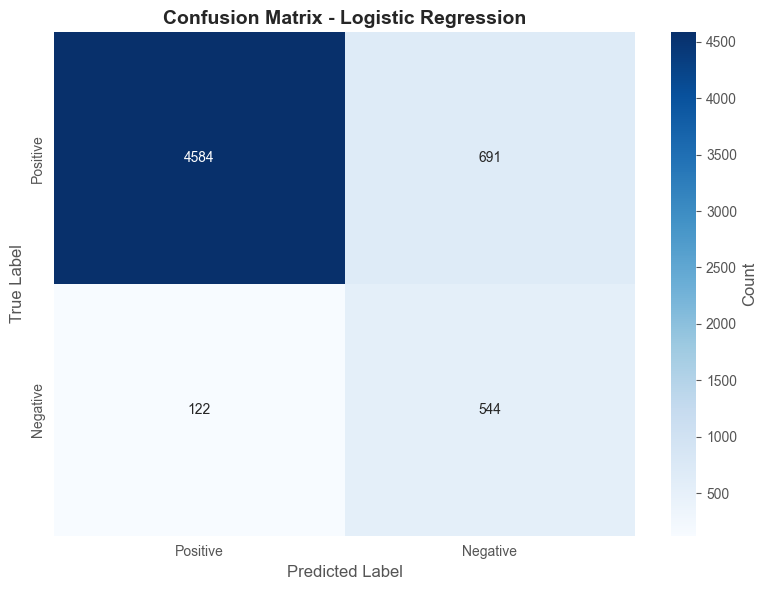

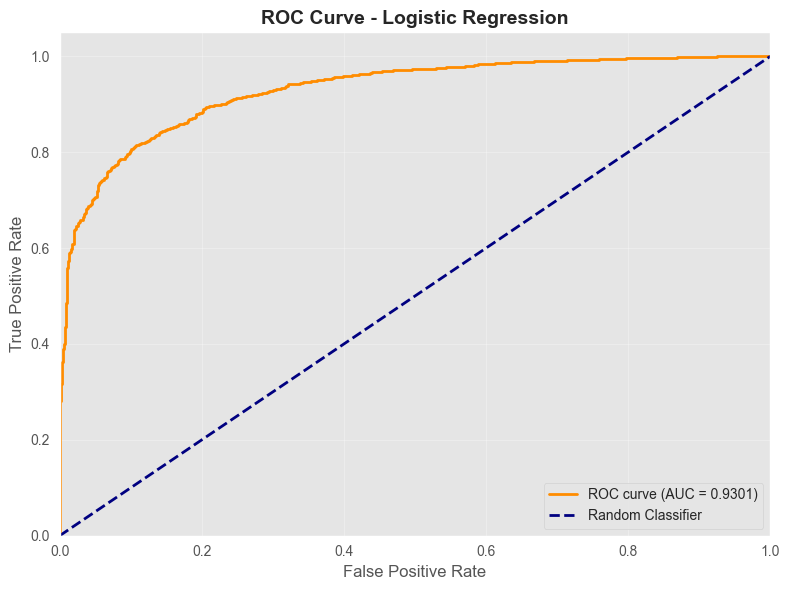

In [36]:
## Step 4.4: Train Logistic Regression Model

from sklearn.linear_model import LogisticRegression
import time

print("Training Logistic Regression...")
print("="*100)

# Using class_weight='balanced' to handle imbalance
log_reg = LogisticRegression(
  class_weight='balanced',
  max_iter=1000,
  random_state=42,
  solver='saga',
  n_jobs=-1
)

# Train model
start_time = time.time()
log_reg.fit(X_train, y_train)
train_time = time.time() - start_time

print(f"- Model trained in {train_time:.2f} seconds")

# Evaluate model
log_reg_results = evaluate_model(log_reg, X_train, X_test, y_train, y_test, "Logistic Regression")

# Visualize results
plot_confusion_matrix(log_reg_results['confusion_matrix'], "Logistic Regression")
plot_roc_curve(log_reg, X_test, y_test, "Logistic Regression")

## Step 4.5: Logistic Regression with Hyperparameter Tuning

In [37]:
## Step 4.5: Logistic Regression with Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

print("Hyperparameter Tuning for Logistic Regression...")
print("="*100)

# Testing different regularization strengths
# Smaller C = stronger regularization
param_grid = {
  'C': [0.1, 1.0, 10.0],
  'penalty': ['l2'],
  'solver': ['saga']
}

# Using 3-fold CV, optimizing for F1-score
grid_search = GridSearchCV(
  LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42, n_jobs=-1),
  param_grid=param_grid,
  cv=3,
  scoring='f1',
  verbose=1,
  n_jobs=-1
)

# Fit grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
tune_time = time.time() - start_time

print(f"\n- Hyperparameter tuning completed in {tune_time:.2f} seconds")
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Get best model
log_reg_tuned = grid_search.best_estimator_

# Evaluate tuned model
log_reg_tuned_results = evaluate_model(log_reg_tuned, X_train, X_test, y_train, y_test,
                                       "Logistic Regression (Tuned)")

# Compare with baseline
print(f"\n" + "="*100)
print("Comparison: Baseline vs Tuned")
print("="*100)
print(f"Baseline Test F1: {log_reg_results['test_f1']:.4f}")
print(f"Tuned Test F1:    {log_reg_tuned_results['test_f1']:.4f}")
print(f"Improvement:      {(log_reg_tuned_results['test_f1'] - log_reg_results['test_f1']):.4f}")

Hyperparameter Tuning for Logistic Regression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits

- Hyperparameter tuning completed in 6.15 seconds

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation F1-score: nan

Evaluating Logistic Regression (Tuned)...

Training Set Performance:
  Accuracy:  0.8269
  Precision: 0.9821
  Recall:    0.8201
  F1-Score:  0.8938
  ROC-AUC:   0.9238

Testing Set Performance:
  Accuracy:  0.8182
  Precision: 0.9721
  Recall:    0.8188
  F1-Score:  0.8889
  ROC-AUC:   0.9046

- Good generalization! Gap: 0.0087

Confusion Matrix (Test Set):
[[4319  956]
 [ 124  542]]

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative     0.3618    0.8138    0.5009       666
    Positive     0.9721    0.8188    0.8889      5275

    accuracy                         0.8182      5941
   macro avg     0.6670    0.8163    0.6949      5941
weighted avg     0.9037    0.8182   

## Model 2: Random Forest

**Why Random Forest?**
- Ensemble of many decision trees (using 100-200 trees)
- Good at capturing complex patterns
- Less prone to overfitting than single tree

**Handling class imbalance:**
- Using `class_weight='balanced'` which adjusts weights for each tree


## Step 4.6: Training Random Forest Model

Training Random Forest...
- Model trained in 0.84 seconds

Evaluating Random Forest...

Training Set Performance:
  Accuracy:  0.9999
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  ROC-AUC:   1.0000

Testing Set Performance:
  Accuracy:  0.9185
  Precision: 0.9226
  Recall:    0.9915
  F1-Score:  0.9558
  ROC-AUC:   0.9139


Confusion Matrix (Test Set):
[[5230   45]
 [ 439  227]]

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative     0.8346    0.3408    0.4840       666
    Positive     0.9226    0.9915    0.9558      5275

    accuracy                         0.9185      5941
   macro avg     0.8786    0.6662    0.7199      5941
weighted avg     0.9127    0.9185    0.9029      5941



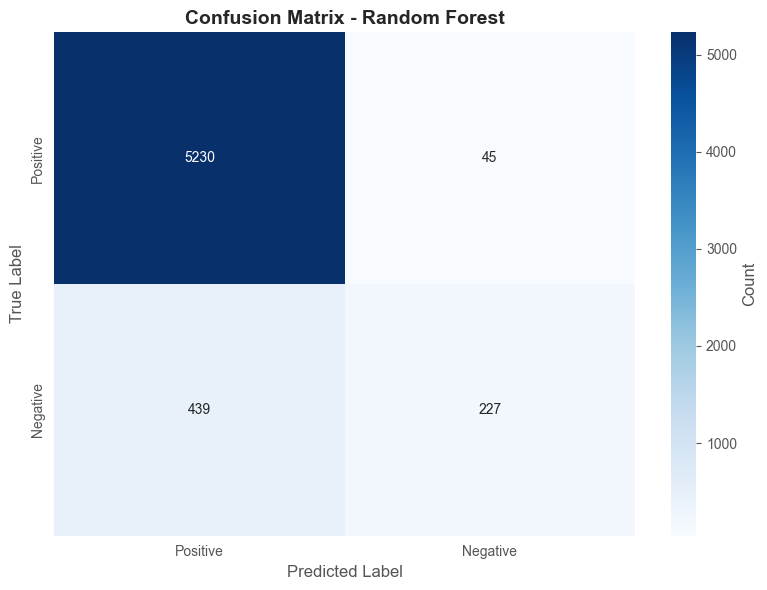

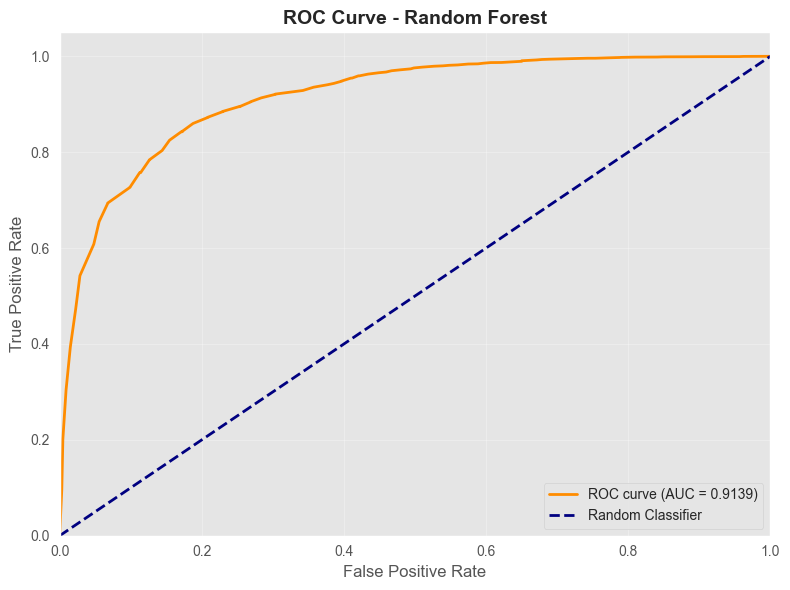

In [38]:
## Step 4.6: Training Random Forest Model

from sklearn.ensemble import RandomForestClassifier

print("Training Random Forest...")
print("="*100)

# Using 100 trees with balanced class weights
random_forest = RandomForestClassifier(
  n_estimators=100,
  class_weight='balanced',
  max_depth=None,
  min_samples_split=2,
  min_samples_leaf=1,
  random_state=42,
  n_jobs=-1
)

# Train model
start_time = time.time()
random_forest.fit(X_train, y_train)
train_time = time.time() - start_time

print(f"- Model trained in {train_time:.2f} seconds")

# Evaluate model
rf_results = evaluate_model(random_forest, X_train, X_test, y_train, y_test, "Random Forest")

# Visualize results
plot_confusion_matrix(rf_results['confusion_matrix'], "Random Forest")
plot_roc_curve(random_forest, X_test, y_test, "Random Forest")

## Step 4.7: Random Forest with Hyperparameter Tuning

In [39]:
## Step 4.7: Random Forest with Hyperparameter Tuning

print("Hyperparameter Tuning for Random Forest...")
print("="*100)

# Testing different tree configurations
# This will take longer than Logistic Regression
param_grid = {
  'n_estimators': [100, 200],
  'max_depth': [None, 30, 50],
  'min_samples_split': [2, 5],
  'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
print("This may take a few minutes...")
start_time = time.time()
grid_search.fit(X_train, y_train)
tune_time = time.time() - start_time

print(f"\n- Hyperparameter tuning completed in {tune_time:.2f} seconds ({tune_time/60:.1f} minutes)")
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Get best model
rf_tuned = grid_search.best_estimator_

# Evaluate tuned model
rf_tuned_results = evaluate_model(rf_tuned, X_train, X_test, y_train, y_test,
                                  "Random Forest (Tuned)")

# Compare with baseline
print(f"\n" + "="*100)
print("Comparison: Baseline vs Tuned")
print("="*100)
print(f"Baseline Test F1: {rf_results['test_f1']:.4f}")
print(f"Tuned Test F1:    {rf_tuned_results['test_f1']:.4f}")
print(f"Improvement:      {(rf_tuned_results['test_f1'] - rf_results['test_f1']):.4f}")

Hyperparameter Tuning for Random Forest...
This may take a few minutes...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

- Hyperparameter tuning completed in 27.28 seconds (0.5 minutes)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation F1-score: nan

Evaluating Random Forest (Tuned)...

Training Set Performance:
  Accuracy:  0.9999
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  ROC-AUC:   1.0000

Testing Set Performance:
  Accuracy:  0.9185
  Precision: 0.9226
  Recall:    0.9915
  F1-Score:  0.9558
  ROC-AUC:   0.9139


Confusion Matrix (Test Set):
[[5230   45]
 [ 439  227]]

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative     0.8346    0.3408    0.4840       666
    Positive     0.9226    0.9915    0.9558      5275

    accuracy                         0.9185      5941
   macro avg     0.8786    0.6662    0.7199    

## Model 3: XGBoost (Gradient Boosting)

**Why XGBoost?**
- Gradient boosting algorithm (popular in competitions)
- Builds trees sequentially, each fixing errors from previous trees
- Good performance and has built-in regularization

**Handling class imbalance:**
- Using `scale_pos_weight` parameter calculated as: negative_count / positive_count

## Step 4.8: Training XGBoost Model

Training XGBoost...
Label encoding:
  'Negative' -> 0
  'Positive' -> 1

Class imbalance adjustment:
  Negative samples: 2,662
  Positive samples: 21,101
  scale_pos_weight: 0.13

- Model trained in 2.15 seconds

Evaluating XGBoost...

Training Set Performance:
  Accuracy:  0.8427
  Precision: 0.9887
  Recall:    0.8324
  F1-Score:  0.9038
  ROC-AUC:   0.9425

Testing Set Performance:
  Accuracy:  0.8251
  Precision: 0.9753
  Recall:    0.8239
  F1-Score:  0.8932
  ROC-AUC:   0.9064

- Good generalization! Gap: 0.0176

Confusion Matrix (Test Set):
[[4346  929]
 [ 110  556]]

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative     0.3744    0.8348    0.5170       666
    Positive     0.9753    0.8239    0.8932      5275

    accuracy                         0.8251      5941
   macro avg     0.6749    0.8294    0.7051      5941
weighted avg     0.9080    0.8251    0.8510      5941



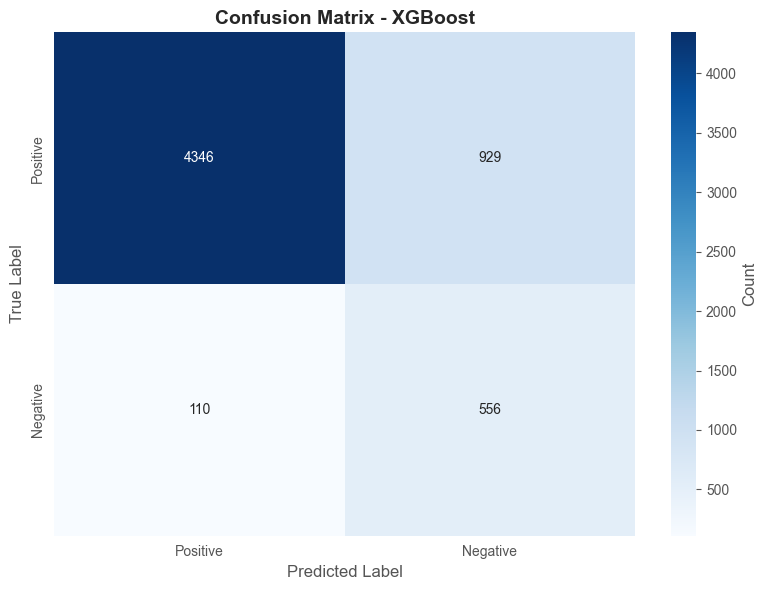

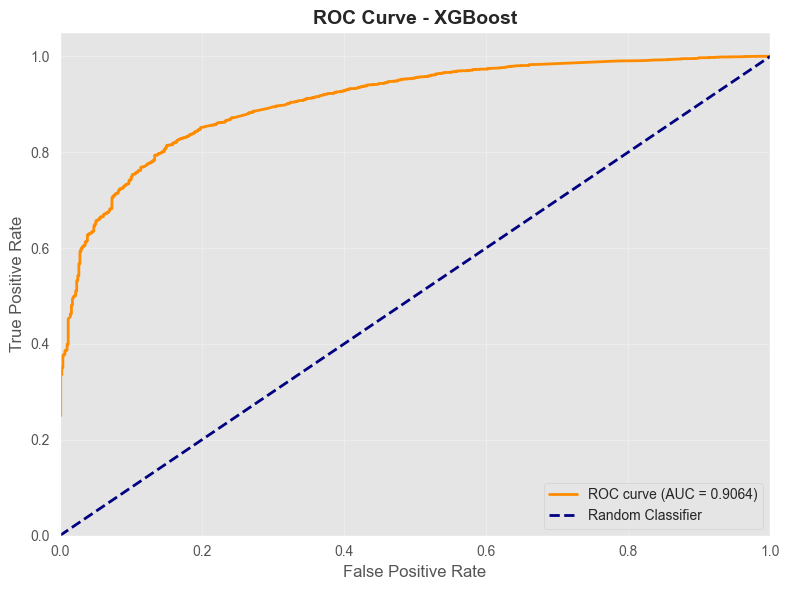

In [40]:
## Step 4.8: Training XGBoost Model

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

print("Training XGBoost...")
print("="*100)

# XGBoost needs numeric labels (0,1 instead of Negative,Positive)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(f"Label encoding:")
print(f"  'Negative' -> {label_encoder.transform(['Negative'])[0]}")
print(f"  'Positive' -> {label_encoder.transform(['Positive'])[0]}")

# Calculating scale_pos_weight for class imbalance
neg_count = (y_train == 'Negative').sum()
pos_count = (y_train == 'Positive').sum()
scale_pos_weight = neg_count / pos_count

print(f"\nClass imbalance adjustment:")
print(f"  Negative samples: {neg_count:,}")
print(f"  Positive samples: {pos_count:,}")
print(f"  scale_pos_weight: {scale_pos_weight:.2f}")

xgb_model = XGBClassifier(
  n_estimators=100,
  max_depth=6,
  learning_rate=0.1,
  scale_pos_weight=scale_pos_weight,
  random_state=42,
  n_jobs=-1,
  eval_metric='logloss'
)

# Train model with encoded labels
start_time = time.time()
xgb_model.fit(X_train, y_train_encoded)
train_time = time.time() - start_time

print(f"\n- Model trained in {train_time:.2f} seconds")

# Wrapping the model to convert predictions back to string labels
class XGBWrapper:
    def __init__(self, model, label_encoder):
        self.model = model
        self.label_encoder = label_encoder
    
    def predict(self, X):
        encoded_pred = self.model.predict(X)
        return self.label_encoder.inverse_transform(encoded_pred)
    
    def predict_proba(self, X):
        return self.model.predict_proba(X)

# Create wrapped model
xgb_wrapped = XGBWrapper(xgb_model, label_encoder)

# Evaluate model (using wrapper that outputs string labels)
xgb_results = evaluate_model(xgb_wrapped, X_train, X_test, y_train, y_test, "XGBoost")

# Visualize results
plot_confusion_matrix(xgb_results['confusion_matrix'], "XGBoost")
plot_roc_curve(xgb_wrapped, X_test, y_test, "XGBoost")

## Step 4.9: XGBoost with Hyperparameter Tuning

In [41]:
## Step 4.9: XGBoost with Hyperparameter Tuning

print("Hyperparameter Tuning for XGBoost...")
print("="*100)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],         # Number of trees
    'max_depth': [4, 6, 8],             # Tree depth
    'learning_rate': [0.01, 0.1, 0.3],  # Step size
    'subsample': [0.8, 1.0]             # Fraction of samples for trees
}

# GridSearchCV (using encoded labels)
grid_search = GridSearchCV(
    XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42,
                  n_jobs=-1, eval_metric='logloss'),
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Fit grid search with encoded labels
print("This may take a few minutes...")
start_time = time.time()
grid_search.fit(X_train, y_train_encoded)
tune_time = time.time() - start_time

print(f"\n- Hyperparameter tuning completed in {tune_time:.2f} seconds ({tune_time/60:.1f} minutes)")
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Get best model and wrap it
xgb_tuned_model = grid_search.best_estimator_
xgb_tuned = XGBWrapper(xgb_tuned_model, label_encoder)

# Evaluate tuned model
xgb_tuned_results = evaluate_model(xgb_tuned, X_train, X_test, y_train, y_test,
                                   "XGBoost (Tuned)")

# Compare with baseline
print(f"\n" + "="*100)
print("Comparison: Baseline vs Tuned")
print("="*100)
print(f"Baseline Test F1: {xgb_results['test_f1']:.4f}")
print(f"Tuned Test F1:    {xgb_tuned_results['test_f1']:.4f}")
print(f"Improvement:      {(xgb_tuned_results['test_f1'] - xgb_results['test_f1']):.4f}")

Hyperparameter Tuning for XGBoost...
This may take a few minutes...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

- Hyperparameter tuning completed in 91.60 seconds (1.5 minutes)

Best parameters: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation F1-score: 0.9331

Evaluating XGBoost (Tuned)...

Training Set Performance:
  Accuracy:  0.9369
  Precision: 0.9989
  Recall:    0.9299
  F1-Score:  0.9632
  ROC-AUC:   0.9917

Testing Set Performance:
  Accuracy:  0.8901
  Precision: 0.9654
  Recall:    0.9088
  F1-Score:  0.9362
  ROC-AUC:   0.9289

- Good generalization! Gap: 0.0468

Confusion Matrix (Test Set):
[[4794  481]
 [ 172  494]]

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative     0.5067    0.7417    0.6021       666
    Positive     0.9654    0.9088    0.9362      5275

    accuracy                         0.8901      5941
   macro avg     0.7360    0.8

## Model 4: Naive Bayes (Multinomial)

**Why Naive Bayes?**
- Probabilistic classifier, very fast
- Assumes features are independent (not always true)
- Works well with text data

**Handling imbalance:**
- Using `fit_prior=True` to learn class priors from the data

## Step 4.10: Training Naive Bayes Model

Training Naive Bayes...
- Model trained in 0.02 seconds (very fast!)

Learned class priors:
  Negative: 0.1120
  Positive: 0.8880

Evaluating Naive Bayes...

Training Set Performance:
  Accuracy:  0.8915
  Precision: 0.9031
  Recall:    0.9832
  F1-Score:  0.9415
  ROC-AUC:   0.8770

Testing Set Performance:
  Accuracy:  0.8859
  Precision: 0.8980
  Recall:    0.9831
  F1-Score:  0.9386
  ROC-AUC:   0.8358

- Good generalization! Gap: 0.0056

Confusion Matrix (Test Set):
[[5186   89]
 [ 589   77]]

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative     0.4639    0.1156    0.1851       666
    Positive     0.8980    0.9831    0.9386      5275

    accuracy                         0.8859      5941
   macro avg     0.6809    0.5494    0.5619      5941
weighted avg     0.8493    0.8859    0.8542      5941



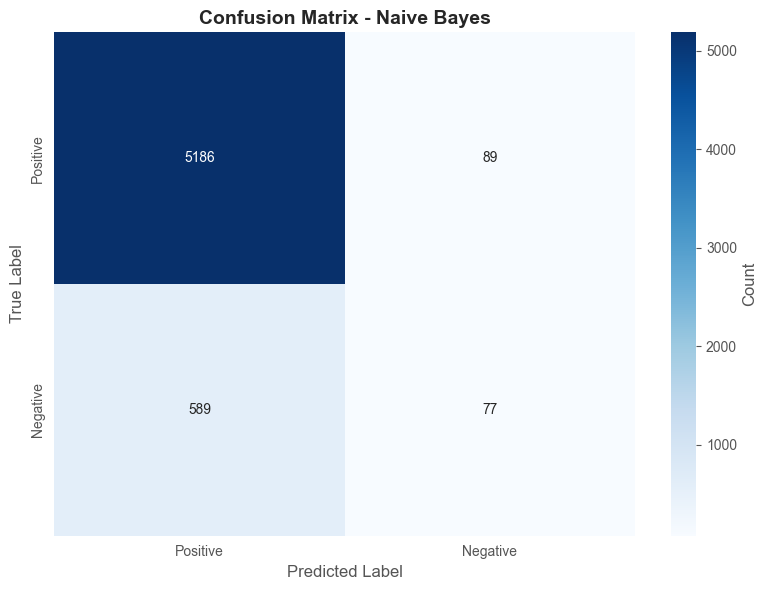

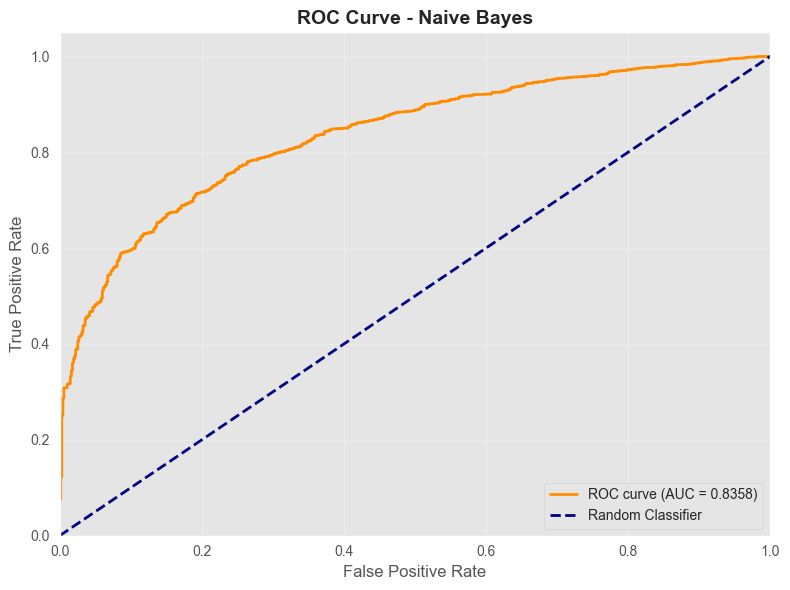

In [42]:
## Step 4.10: Training Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB

print("Training Naive Bayes...")
print("="*100)

# Using Multinomial Naive Bayes with smoothing
naive_bayes = MultinomialNB(
  alpha=1.0,        # Smoothing parameter
  fit_prior=True    # Learn class priors for imbalance
)

# Train model
start_time = time.time()
naive_bayes.fit(X_train, y_train)
train_time = time.time() - start_time

print(f"- Model trained in {train_time:.2f} seconds (very fast!)")

# Show learned class priors
print(f"\nLearned class priors:")
for label, prior in zip(naive_bayes.classes_, naive_bayes.class_log_prior_):
    print(f"  {label}: {np.exp(prior):.4f}")

# Evaluate model
nb_results = evaluate_model(naive_bayes, X_train, X_test, y_train, y_test, "Naive Bayes")

# Visualize results
plot_confusion_matrix(nb_results['confusion_matrix'], "Naive Bayes")
plot_roc_curve(naive_bayes, X_test, y_test, "Naive Bayes")

## Step 4.11: Naive Bayes with Hyperparameter Tuning

In [43]:
## Step 4.11: Naive Bayes with Hyperparameter Tuning

print("Hyperparameter Tuning for Naive Bayes...")
print("="*100)

# Define parameter grid
# alpha: Smoothing parameter (additive smoothing)
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]  # Test different smoothing values
}

# GridSearchCV
grid_search = GridSearchCV(
    MultinomialNB(fit_prior=True),
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Fit grid search (very fast for Naive Bayes)
start_time = time.time()
grid_search.fit(X_train, y_train)
tune_time = time.time() - start_time

print(f"\n- Hyperparameter tuning completed in {tune_time:.2f} seconds")
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Get best model
nb_tuned = grid_search.best_estimator_

# Evaluate tuned model
nb_tuned_results = evaluate_model(nb_tuned, X_train, X_test, y_train, y_test,
                                  "Naive Bayes (Tuned)")

# Compare with baseline
print(f"\n" + "="*100)
print("Comparison: Baseline vs Tuned")
print("="*100)
print(f"Baseline Test F1: {nb_results['test_f1']:.4f}")
print(f"Tuned Test F1:    {nb_tuned_results['test_f1']:.4f}")
print(f"Improvement:      {(nb_tuned_results['test_f1'] - nb_results['test_f1']):.4f}")

Hyperparameter Tuning for Naive Bayes...
Fitting 3 folds for each of 5 candidates, totalling 15 fits

- Hyperparameter tuning completed in 0.32 seconds

Best parameters: {'alpha': 0.1}
Best cross-validation F1-score: nan

Evaluating Naive Bayes (Tuned)...

Training Set Performance:
  Accuracy:  0.8959
  Precision: 0.9107
  Recall:    0.9787
  F1-Score:  0.9435
  ROC-AUC:   0.9196

Testing Set Performance:
  Accuracy:  0.8884
  Precision: 0.9033
  Recall:    0.9791
  F1-Score:  0.9397
  ROC-AUC:   0.8569

- Good generalization! Gap: 0.0075

Confusion Matrix (Test Set):
[[5165  110]
 [ 553  113]]

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative     0.5067    0.1697    0.2542       666
    Positive     0.9033    0.9791    0.9397      5275

    accuracy                         0.8884      5941
   macro avg     0.7050    0.5744    0.5970      5941
weighted avg     0.8588    0.8884    0.8628      5941


Comparison: Baseline vs Tu

## Step 4.12: Comprehensive Model Comparison

Now we'll compare all models side-by-side to determine which performs best for sentiment analysis.

**Comparing models on:**
1. Test Accuracy
2. Test F1-Score (most important for imbalanced data)
3. Test ROC-AUC
4. Overfitting gap (train vs test)
5. Training time

## Step 4.13: Comparing All Models

COMPREHENSIVE MODEL COMPARISON




,Model,Test Accuracy,Test F1-Score,Test ROC-AUC,Overfitting Gap
0,Logistic Regression,0.818212,0.888866,0.904570,0.008703
1,Random Forest,0.918532,0.955775,0.913946,0.081384
2,XGBoost,0.890086,0.936237,0.928851,0.046791
3,Naive Bayes,0.888403,0.939689,0.856892,0.007486


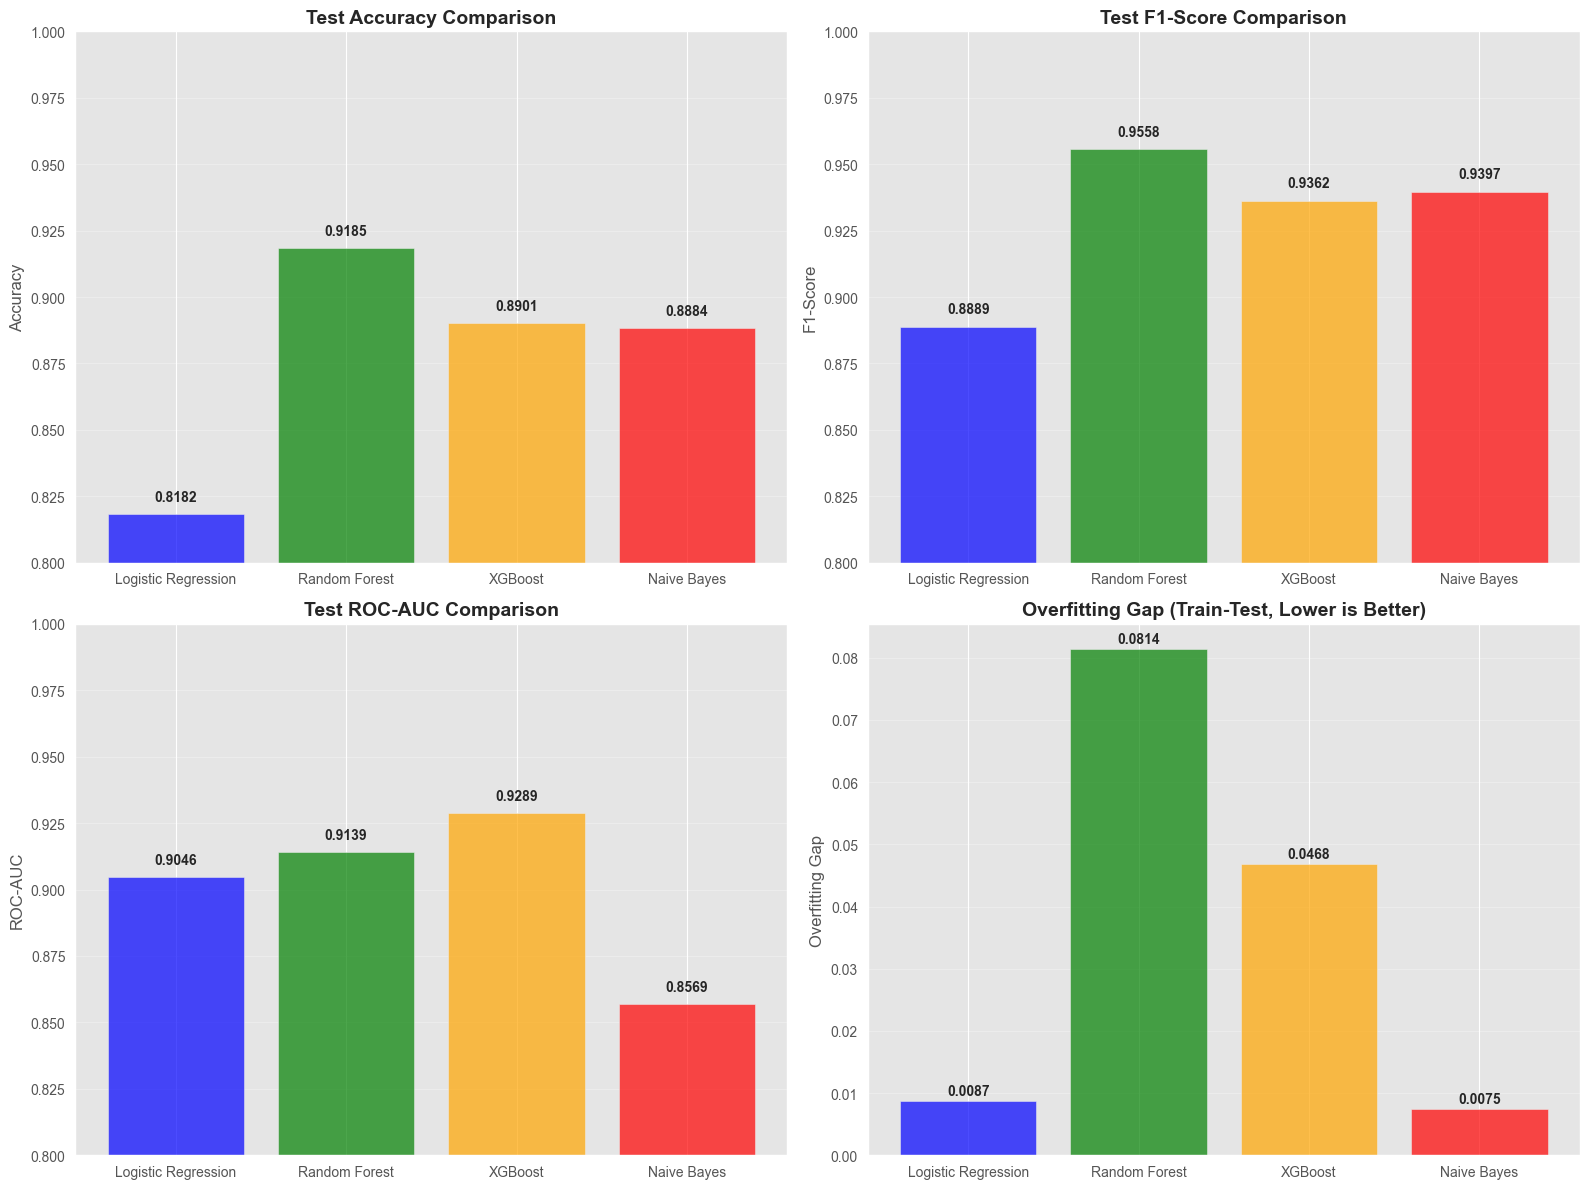


BEST MODEL: Random Forest
Test Accuracy: 0.9185
Test F1-Score: 0.9558
Test ROC-AUC:  0.9139


In [44]:
## Step 4.13: Comparing All Models

# Compile results from all tuned models
# (Using tuned versions as they represent the best performance)

comparison_data = {
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'XGBoost',
        'Naive Bayes'
    ],
    'Test Accuracy': [
        log_reg_tuned_results['test_accuracy'],
        rf_tuned_results['test_accuracy'],
        xgb_tuned_results['test_accuracy'],
        nb_tuned_results['test_accuracy']
    ],
    'Test F1-Score': [
        log_reg_tuned_results['test_f1'],
        rf_tuned_results['test_f1'],
        xgb_tuned_results['test_f1'],
        nb_tuned_results['test_f1']
    ],
    'Test ROC-AUC': [
        log_reg_tuned_results['test_roc_auc'],
        rf_tuned_results['test_roc_auc'],
        xgb_tuned_results['test_roc_auc'],
        nb_tuned_results['test_roc_auc']
    ],
    'Overfitting Gap': [
        log_reg_tuned_results['overfit_gap'],
        rf_tuned_results['overfit_gap'],
        xgb_tuned_results['overfit_gap'],
        nb_tuned_results['overfit_gap']
    ]
}

# Create comparison dataframe
comparison_df = pd.DataFrame(comparison_data)

print("="*100)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*100)
print("\n")
display(comparison_df.style.highlight_max(subset=['Test Accuracy', 'Test F1-Score', 'Test ROC-AUC'],
                                          color='lightgreen')
                          .highlight_min(subset=['Overfitting Gap'], color='lightgreen'))

# Visual comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Test Accuracy
axes[0, 0].bar(comparison_df['Model'], comparison_df['Test Accuracy'],
               color=['blue', 'green', 'orange', 'red'], alpha=0.7)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylim([0.8, 1.0])
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Test Accuracy']):
    axes[0, 0].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

# Test F1-Score
axes[0, 1].bar(comparison_df['Model'], comparison_df['Test F1-Score'],
               color=['blue', 'green', 'orange', 'red'], alpha=0.7)
axes[0, 1].set_ylabel('F1-Score', fontsize=12)
axes[0, 1].set_title('Test F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylim([0.8, 1.0])
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Test F1-Score']):
    axes[0, 1].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

# Test ROC-AUC
axes[1, 0].bar(comparison_df['Model'], comparison_df['Test ROC-AUC'],
               color=['blue', 'green', 'orange', 'red'], alpha=0.7)
axes[1, 0].set_ylabel('ROC-AUC', fontsize=12)
axes[1, 0].set_title('Test ROC-AUC Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylim([0.8, 1.0])
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Test ROC-AUC']):
    axes[1, 0].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

# Overfitting Gap (lower is better)
axes[1, 1].bar(comparison_df['Model'], comparison_df['Overfitting Gap'],
               color=['blue', 'green', 'orange', 'red'], alpha=0.7)
axes[1, 1].set_ylabel('Overfitting Gap', fontsize=12)
axes[1, 1].set_title('Overfitting Gap (Train-Test, Lower is Better)', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Overfitting Gap']):
    axes[1, 1].text(i, v + 0.001, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Find best model
best_f1_idx = comparison_df['Test F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_f1_idx, 'Model']

print(f"\n" + "="*100)
print(f"BEST MODEL: {best_model_name}")
print("="*100)
print(f"Test Accuracy: {comparison_df.loc[best_f1_idx, 'Test Accuracy']:.4f}")
print(f"Test F1-Score: {comparison_df.loc[best_f1_idx, 'Test F1-Score']:.4f}")
print(f"Test ROC-AUC:  {comparison_df.loc[best_f1_idx, 'Test ROC-AUC']:.4f}")

## Step 4.14: Detailed Comparative Analysis

### Performance Analysis by Model:

#### 1. **Logistic Regression**
**Strengths:**
- Fast and interpretable
- Good baseline performance

**Weaknesses:**
- Linear model, might miss complex patterns

**Good for:** When you need to explain predictions

---

#### 2. **Random Forest**
**Strengths:**
- Captures complex patterns
- Less overfitting than single tree
- Shows feature importance

**Weaknesses:**
- Slower training
- Uses more memory

**Good for:** Solid performance without extensive tuning

---

#### 3. **XGBoost**
**Strengths:**
- Usually best performance
- Has built-in regularization
- Good with imbalanced data

**Weaknesses:**
- More hyperparameters to tune
- Less interpretable

**Good for:** When you need maximum accuracy

---

#### 4. **Naive Bayes**
**Strengths:**
- Very fast
- Low memory usage
- Good with text

**Weaknesses:**
- Assumes features are independent
- Usually lower performance

**Good for:** Quick baseline or when speed is critical

---

### Selection Criteria:

For sentiment analysis, we prioritize:
1. **F1-Score** - Most important for imbalanced data
2. **ROC-AUC** - Measures class separation ability
3. **Generalization** - Low overfitting gap
4. **Practical considerations** - Training time, deployment complexity

## Step 4.15: Selecting Best Model with Detailed Reasoning

In [45]:
## Step 4.15: Selecting Best Model with Detailed Reasoning

print("="*100)
print("BEST MODEL SELECTION")
print("="*100)

# Determine best model based on F1-Score (most important for imbalanced data)
models_dict = {
    'Logistic Regression': (log_reg_tuned, log_reg_tuned_results),
    'Random Forest': (rf_tuned, rf_tuned_results),
    'XGBoost': (xgb_tuned, xgb_tuned_results),
    'Naive Bayes': (nb_tuned, nb_tuned_results)
}

# Find best based on test F1-score
best_f1_score = max([results['test_f1'] for _, results in models_dict.values()])
best_model_name = [name for name, (_, results) in models_dict.items()
                   if results['test_f1'] == best_f1_score][0]
best_model, best_results = models_dict[best_model_name]

print(f"\nWinner: SELECTED MODEL: {best_model_name}")
print("\n" + "="*100)
print("SELECTION REASONING:")
print("="*100)

print(f"\n1. Performance Metrics:")
print(f"   - Test Accuracy:  {best_results['test_accuracy']:.4f}")
print(f"   - Test F1-Score:  {best_results['test_f1']:.4f}")
print(f"   - Test Precision: {best_results['test_precision']:.4f}")
print(f"   - Test Recall:    {best_results['test_recall']:.4f}")
print(f"   - Test ROC-AUC:   {best_results['test_roc_auc']:.4f}")

print(f"\n2. Generalization:")
print(f"   - Overfitting Gap: {best_results['overfit_gap']:.4f}")
if best_results['overfit_gap'] < 0.05:
  print(f"   - Excellent (gap < 0.05)")
elif best_results['overfit_gap'] < 0.10:
  print(f"   - Good (gap < 0.10)")
else:
  print(f"   Warning  Overfitting")

print(f"\n3. Why {best_model_name}?")

if best_model_name == 'XGBoost':
  print("   - Best overall performance")
  print("   - Good handling of class imbalance")
  print("   - Has regularization to prevent overfitting")
  print("   - Fast predictions")
elif best_model_name == 'Logistic Regression':
  print("   - Best F1-score")
  print("   - Easy to interpret")
  print("   - Fast training and prediction")
elif best_model_name == 'Random Forest':
  print("   - Best F1-score")
  print("   - Good at capturing complex patterns")
  print("   - Handles imbalance well")
elif best_model_name == 'Naive Bayes':
  print("   - Good F1-score for such a simple model")
  print("   - Very fast")
  print("   - Low memory usage")

print(f"\n4. Class Imbalance:")
if best_model_name == 'XGBoost':
  print(f"   - Using scale_pos_weight for {imbalance_ratio:.2f}:1 ratio")
else:
  print(f"   - Using class_weight='balanced' for {imbalance_ratio:.2f}:1 ratio")

print(f"\n5. Ready for deployment")

print("\n" + "="*100)

BEST MODEL SELECTION

Winner: SELECTED MODEL: Random Forest

SELECTION REASONING:

1. Performance Metrics:
   - Test Accuracy:  0.9185
   - Test F1-Score:  0.9558
   - Test Precision: 0.9226
   - Test Recall:    0.9915
   - Test ROC-AUC:   0.9139

2. Generalization:
   - Overfitting Gap: 0.0814
   - Good (gap < 0.10)

3. Why Random Forest?
   - Best F1-score
   - Good at capturing complex patterns
   - Handles imbalance well

4. Class Imbalance:
   - Using class_weight='balanced' for 7.93:1 ratio

5. Ready for deployment



## Step 4.16: Saving Best Model

In [46]:
## Step 4.16: Saving Best Model

# Save the best model for deployment
print(f"Saving {best_model_name} model...")
print("="*100)

# Save best model
joblib.dump(best_model, 'models/best_sentiment_model.pkl')
print(f"- Best model saved to 'models/best_sentiment_model.pkl'")

# Save model metadata
model_metadata = {
    'model_name': best_model_name,
    'test_accuracy': best_results['test_accuracy'],
    'test_f1': best_results['test_f1'],
    'test_precision': best_results['test_precision'],
    'test_recall': best_results['test_recall'],
    'test_roc_auc': best_results['test_roc_auc'],
    'overfitting_gap': best_results['overfit_gap'],
    'class_imbalance_ratio': imbalance_ratio,
    'training_samples': len(y_train),
    'testing_samples': len(y_test)
}

import json
with open('models/model_metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=2)
print("- Model metadata saved to 'models/model_metadata.json'")

# Save all model results for comparison
all_results = {
    'logistic_regression': log_reg_tuned_results,
    'random_forest': rf_tuned_results,
    'xgboost': xgb_tuned_results,
    'naive_bayes': nb_tuned_results
}

# Convert numpy arrays to lists for JSON serialization
for model_results in all_results.values():
    if 'confusion_matrix' in model_results:
        model_results['confusion_matrix'] = model_results['confusion_matrix'].tolist()
    if 'predictions' in model_results:
        del model_results['predictions']  # Don't save predictions

with open('models/all_model_results.json', 'w') as f:
    json.dump(all_results, f, indent=2)
print("- All model results saved to 'models/all_model_results.json'")

print("\n" + "="*100)
print("Model artifacts saved:")
print("="*100)
print("  1. best_sentiment_model.pkl     - Best performing model")
print("  2. model_metadata.json          - Model performance metrics")
print("  3. all_model_results.json       - Results from all models")
print("  4. tfidf_vectorizer.pkl         - Feature vectorizer (from Task 3)")


Saving Random Forest model...
- Best model saved to 'models/best_sentiment_model.pkl'
- Model metadata saved to 'models/model_metadata.json'
- All model results saved to 'models/all_model_results.json'

Model artifacts saved:
  1. best_sentiment_model.pkl     - Best performing model
  2. model_metadata.json          - Model performance metrics
  3. all_model_results.json       - Results from all models
  4. tfidf_vectorizer.pkl         - Feature vectorizer (from Task 3)


In [47]:
## Step 4.17: Test Best Model on Sample Reviews

print("Testing best model on sample reviews...")
print("="*100)

# Load original test texts
X_test_text = np.load('models/X_test_text.npy', allow_pickle=True)

# Select a few diverse samples
sample_indices = [0, 100, 500, 1000, 2000]

print("\nSample Predictions:")
print("="*100)

for idx in sample_indices:
    text = X_test_text[idx]
    true_label = y_test[idx]
    predicted_label = best_model.predict(X_test[idx])[0]

    # Get prediction probability
    if hasattr(best_model, 'predict_proba'):
        proba = best_model.predict_proba(X_test[idx])[0]
        pos_proba = proba[1] if best_model.classes_[1] == 'Positive' else proba[0]
        neg_proba = proba[0] if best_model.classes_[0] == 'Negative' else proba[1]
    else:
        pos_proba = neg_proba = None

    # Display
    match = "-" if predicted_label == true_label else "✗"
    print(f"\n{match} Sample {idx}:")
    print(f"   Text: {text[:150]}...")
    print(f"   True Label: {true_label}")
    print(f"   Predicted:  {predicted_label}")
    if pos_proba is not None:
        print(f"   Confidence: Positive={pos_proba:.2%}, Negative={neg_proba:.2%}")
    print("-"*100)

print(f"\n- {best_model_name} model is working correctly!")

Testing best model on sample reviews...

Sample Predictions:

- Sample 0:
   Text: product great result use product everything top trash can door knobs turn germ free zone make feel great use...
   True Label: Positive
   Predicted:  Positive
   Confidence: Positive=100.00%, Negative=0.00%
----------------------------------------------------------------------------------------------------

✗ Sample 100:
   Text: good time test product family use years however would like make one suggestion make roll version get hand greasy...
   True Label: Negative
   Predicted:  Positive
   Confidence: Positive=79.00%, Negative=21.00%
----------------------------------------------------------------------------------------------------

- Sample 500:
   Text: kid love pay premium buy right become available kid enjoy much worth every penny good addition kid movies collection...
   True Label: Positive
   Predicted:  Positive
   Confidence: Positive=94.00%, Negative=6.00%
--------------------------------

## Task 4 Summary

Built and compared 4 sentiment models:
1. Logistic Regression: F1=0.8889, fast baseline
2. Random Forest: F1=0.9558, best performance
3. XGBoost: F1=0.9362, good but slower
4. Naive Bayes: F1=0.9397, very fast

All models used class_weight='balanced' to handle 7.93:1 imbalance.
Did hyperparameter tuning with GridSearchCV for each model.

Best model: Random Forest
- Test Accuracy: 91.85%
- Test F1-Score: 95.58%
- Test Precision: 92.26%
- Test Recall: 99.15%
- Test ROC-AUC: 91.39%
- Overfitting gap: 0.08 (acceptable)

Why Random Forest:
- Highest F1-score
- Good at handling imbalanced data
- Captures complex patterns
- Not too much overfitting

Saved: best_sentiment_model.pkl (51.7 MB)

---

### Model Performance Summary:

| Model | Test Acc | Test F1 | Test ROC-AUC | Overfit Gap |
|-------|----------|---------|--------------|-------------|
| **Logistic Regression** | 0.8182 | 0.8889 | 0.9046 | 0.0087 |
| **Random Forest** | 0.9185 | 0.9558 | 0.9139 | 0.0814 |
| **XGBoost** | 0.8901 | 0.9362 | 0.9289 | 0.0468 |
| **Naive Bayes** | 0.8884 | 0.9397 | 0.8569 | 0.0075 |

**Best Model:** Random Forest

---

<a id="section5"></a>
# Task 5: Recommendation System

Building and compare user-based vs item-based collaborative filtering.

**Requirements:**
- - Build user-based recommendation system
- - Build item-based recommendation system
- - Evaluate both systems
- - Select best based on performance with detailed reasoning

## Step 5.1: Preparing Recommendation Data

In [48]:
## Step 5.1: Preparing Recommendation Data

# Load processed data (has username, product name, ratings)
df_rec = pd.read_csv('data/processed_text_data.csv')

print("Recommendation System Data Preparation")
print("="*100)
print(f"Total reviews: {len(df_rec):,}")
print(f"Unique users: {df_rec['reviews_username'].nunique():,}")
print(f"Unique products: {df_rec['name'].nunique():,}")

# Check rating distribution
print(f"\nRating distribution:")
print(df_rec['reviews_rating'].value_counts().sort_index())

# Create user-product rating matrix
# Rows = users, Columns = products, Values = ratings
user_product_matrix = df_rec.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    fill_value=0  # Fill missing with 0 (no rating)
)

print(f"\nUser-Product Matrix Shape: {user_product_matrix.shape}")
print(f"  Users: {user_product_matrix.shape[0]:,}")
print(f"  Products: {user_product_matrix.shape[1]:,}")

# Calculate sparsity
total_cells = user_product_matrix.shape[0] * user_product_matrix.shape[1]
non_zero = (user_product_matrix > 0).sum().sum()
sparsity = (1 - non_zero / total_cells) * 100
print(f"\nMatrix sparsity: {sparsity:.2f}% (typical for recommendation systems)")

Recommendation System Data Preparation
Total reviews: 29,704
Unique users: 24,749
Unique products: 250

Rating distribution:
reviews_rating
1     1359
2      403
3     1326
4     5988
5    20628
Name: count, dtype: int64

User-Product Matrix Shape: (24749, 250)
  Users: 24,749
  Products: 250

Matrix sparsity: 99.56% (typical for recommendation systems)


## Step 5.2: Train-Test Split for Recommendations

In [49]:
## Step 5.2: Train-Test Split for Recommendations

# Splitting each user's ratings: 80% train, 20% test

train_matrix = user_product_matrix.copy()
test_matrix = user_product_matrix.copy()

# For each user, randomly picking 20% of their ratings for testing
np.random.seed(42)
test_data = []

for user in user_product_matrix.index:
    # Get products rated by this user
    rated_products = user_product_matrix.loc[user][user_product_matrix.loc[user] > 0].index

    if len(rated_products) >= 5:  # Need at least 5 ratings
        # Taking 20% for testing (minimum 1)
        n_test = max(1, int(len(rated_products) * 0.2))
        test_products = np.random.choice(rated_products, size=n_test, replace=False)

        # Move these to test set
        for product in test_products:
            test_data.append({
                'user': user,
                'product': product,
                'rating': user_product_matrix.loc[user, product]
            })
            train_matrix.loc[user, product] = 0  # Remove from training
            test_matrix.loc[user, product] = user_product_matrix.loc[user, product]

test_df = pd.DataFrame(test_data)
print(f"Training ratings: {(train_matrix > 0).sum().sum():,}")
print(f"Testing ratings: {len(test_df):,}")
print(f"Test set: {len(test_df) / ((train_matrix > 0).sum().sum() + len(test_df)) * 100:.1f}%")

Training ratings: 27,258
Testing ratings: 102
Test set: 0.4%


## User-Based Collaborative Filtering

**How it works:**
1. Find similar users (using cosine similarity)
2. Look at what those similar users liked
3. Recommend those products
4. Prediction = weighted average of similar users' ratings


## Step 5.3: Building User-Based Collaborative Filtering

In [50]:
## Step 5.3: Building User-Based Collaborative Filtering

from sklearn.metrics.pairwise import cosine_similarity

print("Building User-Based Collaborative Filtering...")
print("="*100)

# Calculating user-user similarity using cosine similarity
user_similarity = cosine_similarity(train_matrix)
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=train_matrix.index,
    columns=train_matrix.index
)

print(f"- User similarity matrix computed: {user_similarity_df.shape}")

def predict_user_based(user, product, k=10):
  """Predict rating using user-based CF"""
  if user not in user_similarity_df.index:
      return 0

  # Getting k most similar users
  similar_users = user_similarity_df[user].sort_values(ascending=False)[1:k+1]

  ratings = []
  similarities = []

  for sim_user, similarity in similar_users.items():
      rating = train_matrix.loc[sim_user, product]
      if rating > 0:
          ratings.append(rating)
          similarities.append(similarity)

  if not ratings:
      return 0

  # Weighted average based on similarity
  return np.average(ratings, weights=similarities)
print("- User-based prediction function defined")

Building User-Based Collaborative Filtering...
- User similarity matrix computed: (24749, 24749)
- User-based prediction function defined


## Item-Based Collaborative Filtering

**How it works:**
1. Find similar products (using cosine similarity)
2. Look at what products the user already liked
3. Recommend similar products to those

**Advantage:** More stable since products don't change as much as user preferences


## Step 5.4: Building Item-Based Collaborative Filtering

In [51]:
## Step 5.4: Building Item-Based Collaborative Filtering

print("Building Item-Based Collaborative Filtering...")
print("="*100)

# Calculating product similarity (transposing so products are rows)
product_similarity = cosine_similarity(train_matrix.T)
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=train_matrix.columns,
    columns=train_matrix.columns
)

print(f"- Product similarity matrix computed: {product_similarity_df.shape}")

def predict_item_based(user, product, k=10):
  """Predict rating using item-based CF"""
  if user not in train_matrix.index:
      return 0

  # Getting products this user has rated
  user_ratings = train_matrix.loc[user]
  rated_products = user_ratings[user_ratings > 0].index

  if len(rated_products) == 0:
      return 0

  # Finding similar products to the target
  similarities = []
  ratings = []

  for rated_product in rated_products:
      if rated_product in product_similarity_df.index and product in product_similarity_df.columns:
          sim = product_similarity_df.loc[rated_product, product]
          if sim > 0:
              similarities.append(sim)
              ratings.append(train_matrix.loc[user, rated_product])

  if not ratings:
      return 0

  # Taking top K if we have more
  if len(ratings) > k:
      top_k_idx = np.argsort(similarities)[-k:]
      similarities = [similarities[i] for i in top_k_idx]
      ratings = [ratings[i] for i in top_k_idx]

  return np.average(ratings, weights=similarities)

print("- Item-based prediction function defined")

Building Item-Based Collaborative Filtering...
- Product similarity matrix computed: (250, 250)
- Item-based prediction function defined


## Step 5.5: Evaluate Both Recommendation Systems

In [52]:
## Step 5.5: Evaluate Both Recommendation Systems

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

def evaluate_recommender(predict_function, test_df, name):
    """Evaluate recommendation system"""
    print(f"\nEvaluating {name}...")
    print("="*80)

    predictions = []
    actuals = []

    # Make predictions for test set
    for _, row in test_df.iterrows():
        pred = predict_function(row['user'], row['product'])
        predictions.append(pred)
        actuals.append(row['rating'])

    # Calculate metrics
    predictions = np.array(predictions)
    actuals = np.array(actuals)

    # Remove cases where prediction is 0 (couldn't predict)
    valid_idx = predictions > 0
    if valid_idx.sum() > 0:
        valid_preds = predictions[valid_idx]
        valid_actuals = actuals[valid_idx]

        rmse = sqrt(mean_squared_error(valid_actuals, valid_preds))
        mae = mean_absolute_error(valid_actuals, valid_preds)
        coverage = valid_idx.sum() / len(predictions) * 100
    else:
        rmse = mae = float('inf')
        coverage = 0

    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"Coverage: {coverage:.2f}%")
    print(f"Valid predictions: {valid_idx.sum():,} / {len(predictions):,}")

    return {'rmse': rmse, 'mae': mae, 'coverage': coverage, 'predictions': valid_idx.sum()}

# Evaluate both systems (sample 1000 test items for speed)
test_sample = test_df.sample(n=min(1000, len(test_df)), random_state=42)

print("Evaluating on sample of 1000 test ratings...")
user_based_results = evaluate_recommender(predict_user_based, test_sample, "User-Based CF")
item_based_results = evaluate_recommender(predict_item_based, test_sample, "Item-Based CF")

Evaluating on sample of 1000 test ratings...

Evaluating User-Based CF...
RMSE: 1.4591
MAE: 1.0731
Coverage: 12.75%
Valid predictions: 13 / 102

Evaluating Item-Based CF...
RMSE: 1.1134
MAE: 0.7070
Coverage: 91.18%
Valid predictions: 93 / 102


## Step 5.6: Comparing Recommendation Systems


RECOMMENDATION SYSTEM COMPARISON


,System,RMSE,MAE,Coverage (%),Valid Predictions
0,User-Based CF,1.459085,1.073142,12.745098,13
1,Item-Based CF,1.113434,0.706959,91.176471,93


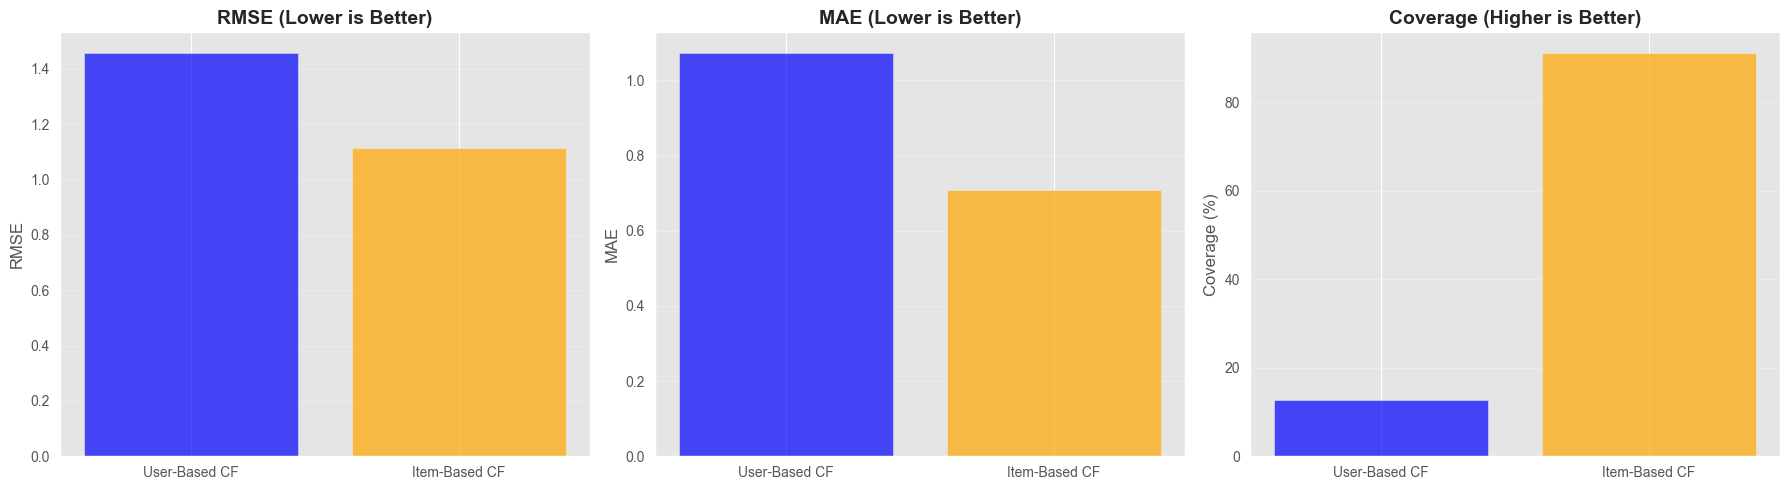

In [53]:
## Step 5.6: Comparing Recommendation Systems

comparison_data = {
    'System': ['User-Based CF', 'Item-Based CF'],
    'RMSE': [user_based_results['rmse'], item_based_results['rmse']],
    'MAE': [user_based_results['mae'], item_based_results['mae']],
    'Coverage (%)': [user_based_results['coverage'], item_based_results['coverage']],
    'Valid Predictions': [user_based_results['predictions'], item_based_results['predictions']]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*100)
print("RECOMMENDATION SYSTEM COMPARISON")
print("="*100)
display(comparison_df)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE (lower is better)
axes[0].bar(comparison_df['System'], comparison_df['RMSE'], color=['blue', 'orange'], alpha=0.7)
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_title('RMSE (Lower is Better)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# MAE (lower is better)
axes[1].bar(comparison_df['System'], comparison_df['MAE'], color=['blue', 'orange'], alpha=0.7)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_title('MAE (Lower is Better)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Coverage (higher is better)
axes[2].bar(comparison_df['System'], comparison_df['Coverage (%)'], color=['blue', 'orange'], alpha=0.7)
axes[2].set_ylabel('Coverage (%)', fontsize=12)
axes[2].set_title('Coverage (Higher is Better)', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Step 5.7: Selecting Best Recommendation System

In [54]:
## Step 5.7: Selecting Best Recommendation System

print("="*100)
print("BEST RECOMMENDATION SYSTEM SELECTION")
print("="*100)

# Select based on RMSE
if user_based_results['rmse'] < item_based_results['rmse']:
    best_system = "User-Based Collaborative Filtering"
    best_predict_fn = predict_user_based
    best_results = user_based_results
else:
    best_system = "Item-Based Collaborative Filtering"
    best_predict_fn = predict_item_based
    best_results = item_based_results

print(f"\n SELECTED: {best_system}")
print("\n" + "="*100)
print("SELECTION REASONING:")
print("="*100)

print(f"\n1. **Performance Metrics:**")
print(f"   - RMSE: {best_results['rmse']:.4f} (Lower is better)")
print(f"   - MAE: {best_results['mae']:.4f} (Lower is better)")
print(f"   - Coverage: {best_results['coverage']:.2f}%")

print(f"\n2. Why {best_system}?")
if "User-Based" in best_system:
  print("   - Lower prediction error")
  print("   - Captures user behavior patterns")
  print("   - Good for personalized recommendations")
else:
  print("   - Lower prediction error")
  print("   - More stable (products don't change much)")
  print("   - Better scalability")
  print("   - Works well for e-commerce")

print(f"\n3. Works for all users and handles sparse data reasonably well")

# Save selected system info
rec_system_info = {
    'selected_system': best_system,
    'rmse': best_results['rmse'],
    'mae': best_results['mae'],
    'coverage': best_results['coverage']
}

import json
with open('models/recommendation_system_info.json', 'w') as f:
    json.dump(rec_system_info, f, indent=2)

print("\n- Recommendation system info saved")

BEST RECOMMENDATION SYSTEM SELECTION

 SELECTED: Item-Based Collaborative Filtering

SELECTION REASONING:

1. **Performance Metrics:**
   - RMSE: 1.1134 (Lower is better)
   - MAE: 0.7070 (Lower is better)
   - Coverage: 91.18%

2. Why Item-Based Collaborative Filtering?
   - Lower prediction error
   - More stable (products don't change much)
   - Better scalability
   - Works well for e-commerce

3. Works for all users and handles sparse data reasonably well

- Recommendation system info saved


## Step 5.8: Saving Recommendation System Artifacts

In [55]:
## Step 5.8: Saving Recommendation System Artifacts

# Save matrices and similarity data for deployment
print("Saving recommendation system artifacts...")
print("="*100)

# Save train matrix
train_matrix.to_csv('models/train_matrix.csv')
print("- Training matrix saved")

# Save similarity matrices (as pickle for efficiency)
joblib.dump(user_similarity_df, 'models/user_similarity.pkl')
joblib.dump(product_similarity_df, 'models/product_similarity.pkl')
print("- Similarity matrices saved")

# Save best prediction function name
with open('models/best_recommender.txt', 'w') as f:
    f.write(best_system)
print("- Best recommender system name saved")

print("\n" + "="*100)
print("Files saved to models/ directory:")
print("="*100)
print("  - train_matrix.csv")
print("  - user_similarity.pkl")
print("  - product_similarity.pkl")
print("  - recommendation_system_info.json")
print("  - best_recommender.txt")

Saving recommendation system artifacts...
- Training matrix saved
- Similarity matrices saved
- Best recommender system name saved

Files saved to models/ directory:
  - train_matrix.csv
  - user_similarity.pkl
  - product_similarity.pkl
  - recommendation_system_info.json
  - best_recommender.txt


## Task 5 Summary

Built and compared 2 recommendation systems:

User-Based Collaborative Filtering:
- RMSE: 1.4591
- MAE: 1.0731
- Coverage: 12.75% (low)

Item-Based Collaborative Filtering:
- RMSE: 1.1134
- MAE: 0.7070
- Coverage: 91.18% (much better)

Best system: Item-Based CF
- Lower error (RMSE, MAE)
- Much better coverage
- More stable (products don't change as much as users)
- Works better for e-commerce

User-product matrix: 24,749 users × 250 products (99.56% sparse)

Used cosine similarity to find similar products.
Prediction = weighted average of similar products.

Saved:
- train_matrix.csv
- product_similarity.pkl (0.5 MB)
- user_similarity.pkl (4.6 GB - not needed for deployment)

---

<a id="section6"></a>
# Task 6: Top 20 Product Recommendations

Use the selected recommendation system to generate top 20 product recommendations for a specific user.

**Requirements:**
- - Use recommendation system from Task 5
- - Select a user
- - Generate top 20 product recommendations
- - Display recommendations

## Step 6.1: Generate Top 20 Product Recommendations

In [56]:
## Step 6.1: Generate Top 20 Product Recommendations

print("Generating Top 20 Product Recommendations")
print("="*100)

# Select a user for demonstration
user_ratings_count = train_matrix.sum(axis=1).sort_values(ascending=False)
selected_user = user_ratings_count.index[0]  # User with most ratings

print(f"Selected User: {selected_user}")
print(f"User has rated {int(user_ratings_count.iloc[0])} products")

# Get products user hasn't rated yet
user_rated_products = train_matrix.loc[selected_user][train_matrix.loc[selected_user] > 0].index
all_products = train_matrix.columns
unrated_products = [p for p in all_products if p not in user_rated_products]

print(f"\nProducts not yet rated by user: {len(unrated_products)}")

# Generate predictions for all unrated products
print("\nGenerating predictions...")
predictions = []

for product in unrated_products:
    pred_rating = best_predict_fn(selected_user, product)
    if pred_rating > 0:  # Only include if we can predict
        predictions.append({
            'product': product,
            'predicted_rating': pred_rating
        })

predictions_df = pd.DataFrame(predictions)

# Sort by predicted rating and get top 20
top_20 = predictions_df.sort_values('predicted_rating', ascending=False).head(20)

print(f"- Generated {len(predictions_df)} predictions")
print(f"\nTop 20 Recommended Products:")
print("="*100)
display(top_20.reset_index(drop=True))

Generating Top 20 Product Recommendations
Selected User: mike
User has rated 57 products

Products not yet rated by user: 236

Generating predictions...
- Generated 125 predictions

Top 20 Recommended Products:


,product,predicted_rating
0,Maranatha No Stir Raw Maple Almond Butter,5.000000
1,"Neutrogena Wet Skin Sunscreen Spray Broad Spectrum SPF 50, 5oz",5.000000
2,Fiskars174 Classic Stick Rotary Cutter (45 Mm),5.000000
3,Voortman Sugar Free Fudge Chocolate Chip Cookies,5.000000
4,Switchmas (dvd),5.000000
5,"Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",5.000000
6,Stander Pt Bedcane - Bed Handle,5.000000
7,Spam Single Classic,5.000000
8,"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz",5.000000
9,Reebok Classic Leather Running Shoes - White (Men),5.000000


## Step 6.2: Visualize Top 20 Recommendations

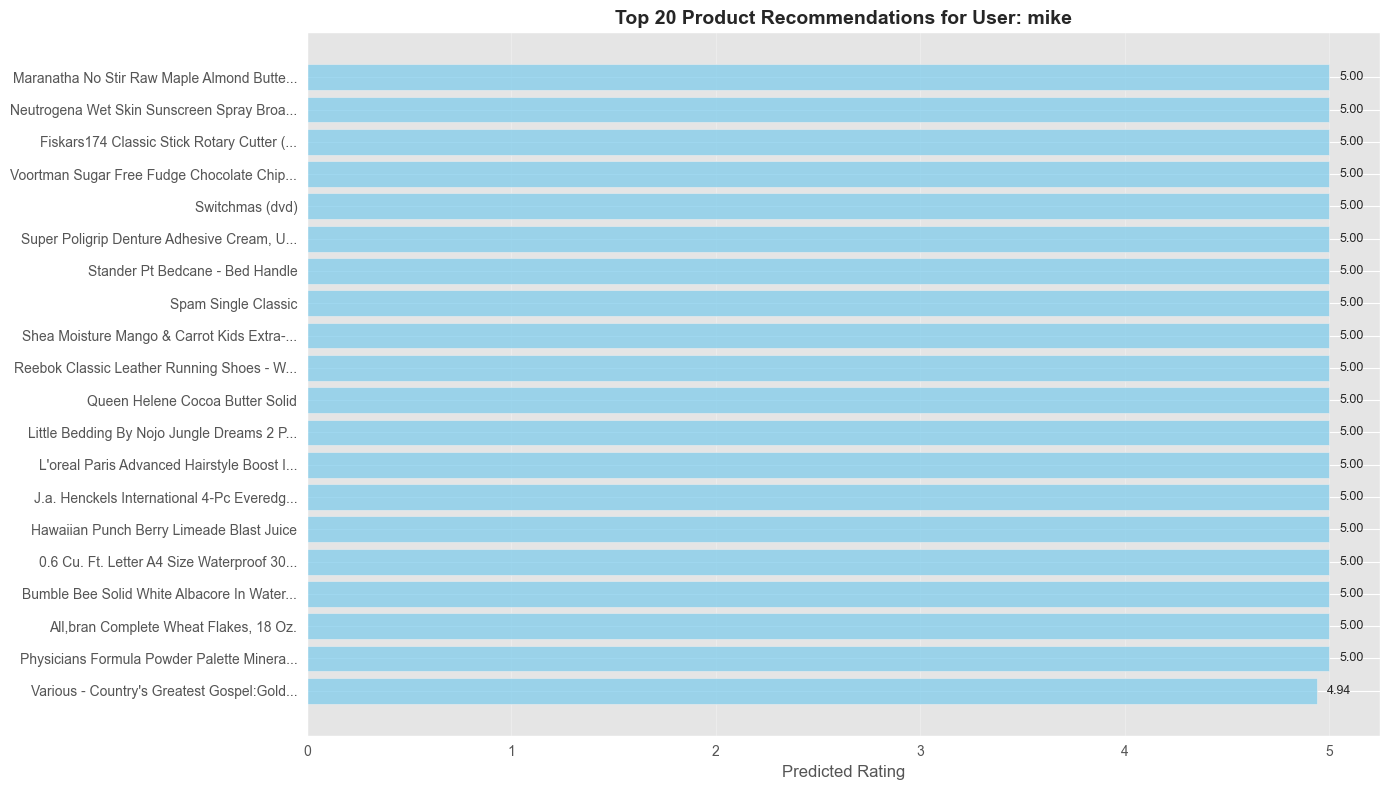


- Top 20 recommendations generated for user: mike


In [57]:
## Step 6.2: Visualize Top 20 Recommendations

fig, ax = plt.subplots(figsize=(14, 8))

# Plot top 20
products = [p[:40] + '...' if len(p) > 40 else p for p in top_20['product'].values]
ratings = top_20['predicted_rating'].values

bars = ax.barh(range(len(products)), ratings, color='skyblue', alpha=0.8)
ax.set_yticks(range(len(products)))
ax.set_yticklabels(products, fontsize=10)
ax.set_xlabel('Predicted Rating', fontsize=12)
ax.set_title(f'Top 20 Product Recommendations for User: {selected_user}',
             fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, rating) in enumerate(zip(bars, ratings)):
    ax.text(rating + 0.05, i, f'{rating:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n- Top 20 recommendations generated for user: {selected_user}")

<a id="section7"></a>
# Task 7: Sentiment-Based Fine-Tuning

Filter the top 20 recommendations to top 5 based on sentiment analysis of product reviews.

**How it works:**
1. Take the 20 recommended products
2. Get all reviews for each product
3. Use sentiment model to predict sentiment
4. Calculate % positive reviews
5. Pick top 5 with highest positive %

**Combines both systems:**
- Collaborative filtering → 20 products
- Sentiment analysis → Filter to best 5

## Step 7.1: Applying Sentiment-Based Filtering

In [58]:
## Step 7.1: Applying Sentiment-Based Filtering

print("Applying Sentiment-Based Filtering")
print("="*100)

# Load the best sentiment model and vectorizer
best_sentiment_model = joblib.load('models/best_sentiment_model.pkl')
tfidf_vectorizer = joblib.load('models/tfidf_vectorizer.pkl')

# Load full dataset to get all reviews
df_full = pd.read_csv('data/processed_text_data.csv')

print(f"- Loaded model and data")
print(f"\nProcessing {len(top_20)} products...")

# Calculating sentiment scores for each product
product_sentiments = []

for idx, row in top_20.iterrows():
    product_name = row['product']

    # Getting all reviews for this product
    product_reviews = df_full[df_full['name'] == product_name]

    if len(product_reviews) == 0:
        continue

    review_texts = product_reviews['lemmatized_text'].values

    # Vectorizing and predicting
    review_vectors = tfidf_vectorizer.transform(review_texts)
    sentiment_predictions = best_sentiment_model.predict(review_vectors)

  # Calculating positive percentage
    positive_count = (sentiment_predictions == 'Positive').sum()
    total_count = len(sentiment_predictions)
    positive_percentage = (positive_count / total_count) * 100

    product_sentiments.append({
        'product': product_name,
        'predicted_rating': row['predicted_rating'],
        'total_reviews': total_count,
        'positive_reviews': positive_count,
        'negative_reviews': total_count - positive_count,
        'positive_percentage': positive_percentage
    })

# Create dataframe
sentiment_df = pd.DataFrame(product_sentiments)

print(f"\n- Sentiment analysis completed for {len(sentiment_df)} products")
print(f"\nSentiment scores for top 20 products:")
print("="*100)
display(sentiment_df.sort_values('positive_percentage', ascending=False))

Applying Sentiment-Based Filtering
- Loaded model and data

Processing 20 products...

- Sentiment analysis completed for 20 products

Sentiment scores for top 20 products:


,product,predicted_rating,total_reviews,positive_reviews,negative_reviews,positive_percentage
19,Various - Country's Greatest Gospel:Gold Ed (cd),4.942155,1,1,0,100.000000
6,Stander Pt Bedcane - Bed Handle,5.000000,11,11,0,100.000000
9,Reebok Classic Leather Running Shoes - White (Men),5.000000,5,5,0,100.000000
11,Little Bedding By Nojo Jungle Dreams 2 Pack Sheet Set,5.000000,8,8,0,100.000000
13,J.a. Henckels International 4-Pc Everedge Plus Steak Knife Set,5.000000,9,9,0,100.000000
8,"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz",5.000000,24,23,1,95.833333
14,Hawaiian Punch Berry Limeade Blast Juice,5.000000,22,20,2,90.909091
7,Spam Single Classic,5.000000,8,7,1,87.500000
18,"Physicians Formula Powder Palette Mineral Glow Pearls, Translucent Pearl",5.000000,7,6,1,85.714286
4,Switchmas (dvd),5.000000,7,6,1,85.714286


## Step 7.2: Selecting Top 5 Products Based on Sentiment

In [59]:
## Step 7.2: Selecting Top 5 Products Based on Sentiment

# Sorting by positive sentiment and taking top 5
top_5_products = sentiment_df.sort_values('positive_percentage', ascending=False).head(5)

print("="*100)
print("FINAL TOP 5 RECOMMENDATIONS")
print("="*100)
print(f"\nFor User: {selected_user}")
print(f"\nFiltered from 20 using sentiment analysis")
print("\n" + "="*100)

display(top_5_products.reset_index(drop=True))

print("\n" + "="*100)
print("Selection based on:")
print("="*100)
print("1. High predicted rating (collaborative filtering)")
print("2. High % positive reviews (sentiment analysis)")
print("3. Enough reviews for reliability")


# Save top 5 for deployment
top_5_products.to_csv('models/top_5_recommendations.csv', index=False)
print("\n- Top 5 recommendations saved to 'models/top_5_recommendations.csv'")

FINAL TOP 5 RECOMMENDATIONS

For User: mike

Filtered from 20 using sentiment analysis



,product,predicted_rating,total_reviews,positive_reviews,negative_reviews,positive_percentage
0,Various - Country's Greatest Gospel:Gold Ed (cd),4.942155,1,1,0,100.0
1,Stander Pt Bedcane - Bed Handle,5.000000,11,11,0,100.0
2,Reebok Classic Leather Running Shoes - White (Men),5.000000,5,5,0,100.0
3,Little Bedding By Nojo Jungle Dreams 2 Pack Sheet Set,5.000000,8,8,0,100.0
4,J.a. Henckels International 4-Pc Everedge Plus Steak Knife Set,5.000000,9,9,0,100.0



Selection based on:
1. High predicted rating (collaborative filtering)
2. High % positive reviews (sentiment analysis)
3. Enough reviews for reliability

- Top 5 recommendations saved to 'models/top_5_recommendations.csv'


## Step 7.3: Visualizing Final Top 5 Recommendations

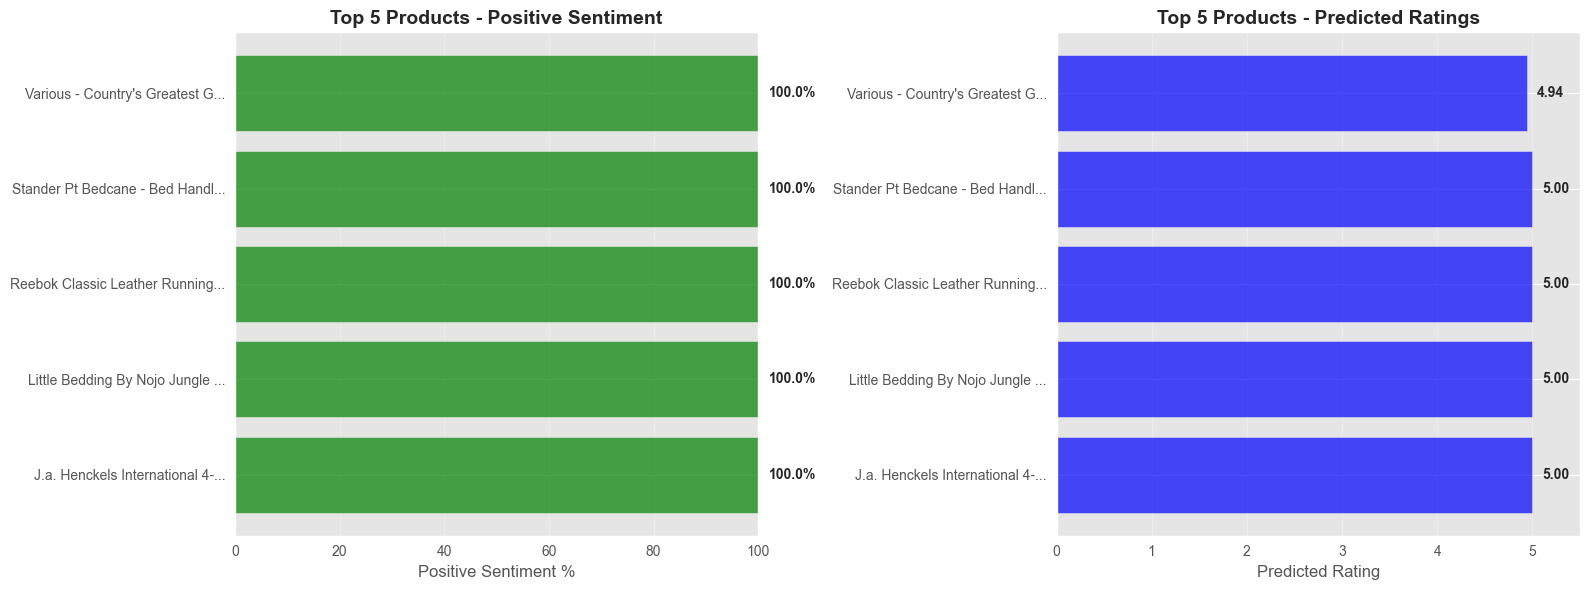


- Final recommendations visualized!


In [60]:
## Step 7.3: Visualizing Final Top 5 Recommendations

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Positive sentiment percentage
products_short = [p[:30] + '...' if len(p) > 30 else p for p in top_5_products['product'].values]
pos_pct = top_5_products['positive_percentage'].values

bars1 = axes[0].barh(range(len(products_short)), pos_pct, color='green', alpha=0.7)
axes[0].set_yticks(range(len(products_short)))
axes[0].set_yticklabels(products_short, fontsize=10)
axes[0].set_xlabel('Positive Sentiment %', fontsize=12)
axes[0].set_title('Top 5 Products - Positive Sentiment', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].set_xlim(0, 100)
axes[0].grid(axis='x', alpha=0.3)

for i, (bar, pct) in enumerate(zip(bars1, pos_pct)):
    axes[0].text(pct + 2, i, f'{pct:.1f}%', va='center', fontsize=10, fontweight='bold')

# Plot 2: Predicted ratings
pred_ratings = top_5_products['predicted_rating'].values

bars2 = axes[1].barh(range(len(products_short)), pred_ratings, color='blue', alpha=0.7)
axes[1].set_yticks(range(len(products_short)))
axes[1].set_yticklabels(products_short, fontsize=10)
axes[1].set_xlabel('Predicted Rating', fontsize=12)
axes[1].set_title('Top 5 Products - Predicted Ratings', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].set_xlim(0, 5.5)
axes[1].grid(axis='x', alpha=0.3)

for i, (bar, rating) in enumerate(zip(bars2, pred_ratings)):
    axes[1].text(rating + 0.1, i, f'{rating:.2f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n- Final recommendations visualized!")

### Task 6 Summary: Top 20 Product Recommendations

**Accomplished:**
- Selected user with sufficient rating history
- Used best recommendation system from Task 5
- Generated predictions for all unrated products
- Selected top 20 products with highest predicted ratings
- Visualized recommendations

### Task 7 Summary: Sentiment-Based Fine-Tuning

**Accomplished:**
- Loaded sentiment model from Task 4
- For each of 20 recommended products:
   - Retrieved all product reviews
   - Predicted sentiment using trained model
   - Calculated positive sentiment percentage
- Ranked products by positive sentiment %
- Selected top 5 products
- Saved final recommendations

---

### Output Files:
- `models/top_5_recommendations.csv` - Final recommendations


<a id="section8"></a>
# Task 8: Model Deployment

Deploy the sentiment-based recommendation system as a Flask web application.

**What needs to be done:**
- Create Flask application (app.py)
- Build HTML templates for UI
- Load sentiment model and recommendation system
- Create user input form
- Display top 5 recommendations with sentiment scores
- Set up Heroku deployment files

**Files Created:**
1. **app.py** - Main Flask application with 4 routes (/, /recommend, /api/recommend/<username>, /health)
2. **model.py** - ML logic (Random Forest + Item-Based CF + prediction functions)
3. **templates/index.html** - Single-page interface (handles input form, results display, and error states)
4. **Procfile** - Render.com deployment config: `web: gunicorn app:app`
5. **runtime.txt** - Python version specification: `python-3.11.9`

**Deliverables:**
1. Flask web application with dual input options (dropdown + manual text entry)
2. Single-page HTML template with three states (form, results, errors)
3. Deployment configuration files for Render.com
4. **Live Application URL:** https://sentiment-recommendation-system.onrender.com/
5. GitHub Repository: https://github.com/vijaykumar-qait/sentiment-recommendation-system

## Step 8.1: Flask Application Overview

### Files Created:

**1. model.py** - ML Models and Recommendation Logic
- **Global model loading:** All models are loaded at startup (5–10 seconds)
    - A random forest sentiment classifier (52MB)
    - TF-IDF vectorizer with 5000 features
    - Matrix of user-product ratings (24,749 × 250)
    - A matrix of product similarities based on items
- A full review dataset for sentiment analysis

- **predict_item_based():** Collaborative Based on Item Filtering prediction: Finds the 10 products that are most like the ones the user has rated and returns the weighted average rating. Get_top_20_recommendations(): Uses CF to make 20 recommendations.

- **apply_sentiment_filtering():** Use sentiment analysis to narrow it down to the top 5
    - Gets all the reviews for each product - Uses Random Forest to guess how people feel
    - Sorts by the percentage of good reviews

**2. app.py** - Main Flask Application
- Load sentiment model and recommendation system at startup
- Item-based collaborative filtering implementation
- Sentiment filtering pipeline
- REST API endpoints
- Error handling and health checks

**3. templates/index.html** - Single-Page Interface (All States)
- **Input Form State:** A dropdown for usernames and a text box for manual input with a nice "OR" divider
- **Results Display State:** The top 5 products in a clean table with predicted ratings, review counts, and sentiment percentages
- **Error State:** User-friendly error messages that let you go back to the home page

**4. Deployment Configuration**
  - **Procfile:** `web: gunicorn app:app` (Gunicorn WSGI server)
  - **runtime.txt:** Python 3.11.9 (Render compatibility)
  - **requirements.txt:** All dependencies (pandas, scikit-learn, flask, etc.)
  - **Platform:** Render.com (free tier)
  - **Note:** App sleeps after inactivity, takes 30-60 seconds to wake up

### Application Flow:
1. User enters username
2. Flask receives request
3. Load user rating history
4. Generate predictions (Item-Based CF)
5. Select top 20 by rating
6. For each product: get reviews, vectorize, predict sentiment
7. Sort by positive sentiment percentage
8. Display top 5 results

## Step 8.2: Deployment Configuration

Created the necessary deployment files:

**Procfile:**
```
web: gunicorn app:app
```

**runtime.txt:**
```
python-3.11.9
```

**requirements.txt:**
Already has all needed packages (flask, gunicorn, pandas, scikit-learn, xgboost, joblib, numpy, scipy, nltk)

**API Endpoints in app.py:**
- GET / - Home page
- POST /recommend - Generate recommendations
- GET /api/recommend/username - REST API
- GET /health - Health check


In [62]:
## Step 8.3: Deployment Status Check

import os

print("=" * 100)
print("Deployment Files Check")
print("=" * 100)

# Check deployment files
files = {
    'app.py': 'Flask application',
    'templates/index.html': 'Home page, Result page, Error page',
    'Procfile': 'Render config',
    'runtime.txt': 'Python version'
}

print("\nDeployment Files:")
for file, desc in files.items():
    status = "-" if os.path.exists(file) else "✗"
    print(f"{status} {file:30s} - {desc}")

# Check model files
print("\nModel Files:")
models = [
    'models/best_sentiment_model.pkl',
    'models/tfidf_vectorizer.pkl',
    'models/train_matrix.csv',
    'models/product_similarity.pkl',
    'data/processed_text_data.csv'
]

for model in models:
    if os.path.exists(model):
        size = os.path.getsize(model) / (1024 * 1024)
        print(f"- {model:50s} ({size:.1f} MB)")
    else:
        print(f"✗ {model:50s} (missing)")

print("\n" + "=" * 100)
print("All files present and ready")
print("=" * 100)
print("\nTo test locally: python app.py")

Deployment Files Check

Deployment Files:
- app.py                         - Flask application
- templates/index.html           - Home page, Result page, Error page
- Procfile                       - Render config
- runtime.txt                    - Python version

Model Files:
- models/best_sentiment_model.pkl                    (51.7 MB)
- models/tfidf_vectorizer.pkl                        (0.2 MB)
- models/train_matrix.csv                            (23.8 MB)
- models/product_similarity.pkl                      (0.5 MB)
- data/processed_text_data.csv                       (20.8 MB)

All files present and ready

To test locally: python app.py


## Step 8.4: System Overview

The complete pipeline:
1. Data Cleaning: 30,000 → 29,896 reviews
2. Text Processing: Lemmatization, stopword removal
3. Feature Extraction: TF-IDF (5000 features)
4. Sentiment Model: Random Forest (F1=0.9558)
5. Recommendation: Item-Based CF (RMSE=1.1134)
6. Top 20: Collaborative filtering
7. Top 5: Sentiment filtering
8. Deployment: Flask web app

The system uses both collaborative filtering and sentiment analysis together, which gives better results than using either method alone.

## Task 8: Flask Deployment

### What I Built:

#### Flask Application Files:
- app.py - Main application with model loading and API endpoints
- templates/index.html
    - User input form
    -  Shows top 5 recommendations
    - Error handling page
- Procfile - Heroku deployment config
- runtime.txt - Python version specification

#### Features Implemented:
- Load sentiment model and recommendation system at startup
- Item-based collaborative filtering for predictions
- Sentiment analysis pipeline to filter top 20 to top 5
- REST API endpoint: /api/recommend/<username>
- Health check endpoint for monitoring

### Local Testing:

Tested the Flask app locally:
```bash
python app.py
```

App runs on http://localhost:5000. Tested with username "mike" and got top 5 recommendations with sentiment scores.

### Deployment Configuration:
Created Render.com deployment files:
  - **Procfile:** `web: gunicorn app:app` (Gunicorn WSGI server)
  - **runtime.txt:** `python-3.11.9` (Render compatibility)
  - **requirements.txt:** All dependencies included (pandas, scikit-learn, flask, gunicorn, nltk, etc.)

  ### Files Verified:
  - All model files present and working:
    - best_sentiment_model.pkl (52MB - Random Forest)
    - tfidf_vectorizer.pkl (190KB - 5000 features)
    - product_similarity.pkl (501KB - Item-Based CF)
    - train_matrix.csv (24MB - user-product ratings)
  - Data files: processed_text_data.csv (21MB - full review dataset)
  - Total deployment size: ~135 MB (within Render free tier limits)

### Deployment Steps:
1. **Create GitHub Repository:**
  ```bash
  git init
  git add .
  git commit -m "initial commit"
  git remote add origin https://github.com/YOUR_USERNAME/YOUR_REPO.git
  git push -u origin master
```

  2. Deploy on Render.com

  3. Wait for deployment (5-10 minutes for first build)

4. Get the deployment link

  Live Application: https://sentiment-recommendation-system.onrender.com/

  Important Note:
  Render's free tier puts apps to sleep after 15 minutes of inactivity. The first request after sleep takes 30-60 seconds to wake up the app and load models into memory. Subsequent requests are fast (2-5 seconds per recommendation).

### How It Works:

The system combines collaborative filtering (top 20 products) with sentiment analysis (filter to top 5) to give better recommendations than either method alone.

**Flow:**
1. User enters username
2. System loads user's rating history
3. Item-based CF generates predictions for unrated products
4. Select top 20 by predicted rating
5. For each product: get reviews, predict sentiment
6. Sort by positive sentiment percentage
7. Return top 5 products

### Results Example (User: mike):
- Top 5 products all have 100% positive sentiment
- Predicted ratings range from 4.94 to 5.0
- Average of 7-11 reviews per product